In [70]:
# Import packages

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

auth = ('FDS_DEMO_EUR_464603_SERVICES', '6hc85SGcgWCrkbJo')

In [2]:
## Define the names of factors that you are interested and enter their corresponding screening formulas

qfl_data = pd.read_excel('QFL.xlsx', header = 1)

qfl_data = qfl_data.drop(['Unnamed: 0'], axis = 1)

qfl_data.head()

,Factor Group,Field ID,Field Name,FactSet Screening Formula,Data Source,Unnamed: 6,Currency,Shares,CACCESS,Search Keywords,Data Type,String Length
0,Asset Data,DAYS_SINCE_RPT,Days Since Report,QFL_DAYS_SINCE_RPT(0),FactSet Estimates,"'Days Since Report': 'QFL_DAYS_SINCE_RPT(0)',",None,0,00QFL,"asset,data,estimates",INTEGER,NaN
1,Asset Data,DAYS_TO_RPT,Days to Report,QFL_DAYS_TO_RPT(0),FactSet Estimates,"'Days to Report': 'QFL_DAYS_TO_RPT(0)',",None,0,00QFL,"asset,data,estimates",INTEGER,NaN
2,Asset Data,ADR_FLAG,ADR Flag,QFL_ADR_FLAG(0),FactSet Reference Data,"'ADR Flag': 'QFL_ADR_FLAG(0)',",None,0,00QFL,"asset,reference,data",INTEGER,NaN
3,Asset Data,BANKRUPTCY,Bankruptcy Flag,QFL_BANKRUPTCY(0),FactSet Reference Data,"'Bankruptcy Flag': 'QFL_BANKRUPTCY(0)',",None,0,00QFL,"asset,reference,data",INTEGER,NaN
4,Asset Data,PRIMARY_LIST,Primary Listing,QFL_PRIMARY_LIST(0),FactSet Reference Data,"'Primary Listing': 'QFL_PRIMARY_LIST(0)',",None,0,00QFL,"asset,reference,data",INTEGER,NaN


In [3]:
# create QFL factor categories dictionary: Key = Field Name, Values = FactSet Screening Formula

qfl_categories = qfl_data['Factor Group'].unique()
qfl_categories = list(np.delete(qfl_categories, [0,1,2]))

for i in qfl_categories:
    globals()['qfl_{0}'.format(i).lower()] = dict(qfl_data[qfl_data['Factor Group'] == i][['FactSet Screening Formula', 'FactSet Screening Formula']].values)

qfl_categories

['Size',
 'Value',
 'Growth',
 'Profitability',
 'Efficiency',
 'Solvency',
 'Management',
 'Quality',
 'Analyst Sentiment',
 'Crowding',
 'Insider Activity',
 'Corporate Governance',
 'Momentum',
 'Volatility',
 'Market Sensitivity',
 'Technical',
 'Liquidity']

In [4]:
qfl_factors = qfl_size # change QFL Category here!

formulas = list(qfl_factors.values())
columns = list(qfl_factors.keys())

In [324]:
# Define Universe & QFL parameters

endpoint = "https://datadirect.factset.com/services/FastFetch?"
factlet = "ExtractBenchmarkDetail"

ids = "890100"
date = "11/30/2020"
fwd_date = "12/31/2020"

# Forward Returns, Size Class, Security Market Value (USD)

params = ['P_TOTAL_RETURN(' + str(date) + ',' + str(fwd_date) + ')',
          'QFL_SIZE_CLASS(' + str(date) + ')',
          'QFL_MKT_VAL_SEC(' + str(date) + ')']

items = 'PROPER_NAME, FG_GICS_SECTOR, PROPER(FG_COUNTRY)'

items_call = items + ',' + ','.join([str(elem) for elem in params]) + ',' + ','.join([str(qfl_elem) for qfl_elem in list(qfl_factors.values())])

# cutoff = "10"
output_format = "pipe"
showTitle = "N"
showHeader = "N"
showDataType = "N"

response = requests.post(endpoint, auth=auth, data = {'factlet':factlet, 
                                                      'ids':ids, 
                                                      'items': items_call,
                                                      'dates':date, 
                                                      # 'cutoff':cutoff,
                                                      'format':output_format,
                                                      'showTitle':showTitle,
                                                      'showHeader':showHeader,
                                                      'showDataType':showDataType})

df = pd.read_csv(io.StringIO(response.text), sep = '|')

In [364]:
col_universe = ['BENCHMARK_ID', 'DATE', 'SECURITY_ID', 'Weight', 'proper_name',
       'fg_gics_sector', 'proper', 'p_total_return', 'qfl_size_class', 'qfl_mkt_val_sec']
items_call_pipe = '|'.join([str(qfl_elem) for qfl_elem in list(qfl_factors.values())])
columns_name = col_universe + items_call_pipe.split('|')
df.columns = pd.Index(columns_name)

In [365]:
qfl_df = df

In [366]:
qfl_df.head()

,BENCHMARK_ID,DATE,SECURITY_ID,Weight,proper_name,fg_gics_sector,proper,p_total_return,qfl_size_class,qfl_mkt_val_sec,QFL_SIZE_CLASS(0),QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
0,890100,30-Nov-2020,03783310,4.204100,Apple Inc.,Information Technology,United States,11.457372,Mega Cap,2024064.4,Mega Cap,1982240.1,2024064.4,3048.4595,2013539.1,65339.0,274150.0,323888.0,4.815023,10.526321,22.238337,41.352060,53.235850,53.235850,4.898180,5.215001,5.060795,4.992971,5.136381,5.242146,4.810380,5.370616,5.093326,5.168695,5.553231,10.500846,11.482506,11.375866,11.450022,11.961327,12.458249,10.364318,10.989257,10.724171,10.497783,10.672603,22.324013,23.899582,23.629005,23.637407,24.309675,25.242876,23.283264,25.320470,22.874163,23.128052,24.448503,41.745290,43.379280,42.558830,42.219204,42.344550,43.783707,45.585050,47.206500,45.647140,45.030937,37.111700
1,890100,30-Nov-2020,59491810,3.141281,Microsoft Corporation,Information Technology,United States,3.900588,Mega Cap,1618475.4,Mega Cap,1627245.5,1618475.4,2925.6792,1572484.5,123392.0,147114.0,301001.0,2.583831,6.186372,16.286043,50.190857,49.598522,49.598522,2.551821,2.609874,2.675052,2.813686,NaN,NaN,2.265604,2.169726,1.992011,2.043462,2.232309,6.187580,6.215072,6.242976,6.398845,NaN,NaN,6.224180,6.201993,5.301732,5.667617,6.940536,16.626749,16.364513,16.372917,16.633469,NaN,NaN,16.916397,17.354431,15.915146,18.754684,16.667847,51.737278,49.050716,47.332836,46.478188,NaN,NaN,53.335120,66.884210,60.800846,66.780045,73.142780
2,890100,30-Nov-2020,02313510,2.735749,"Amazon.com, Inc.",Consumer Discretionary,United States,2.805829,Mega Cap,1589567.8,Mega Cap,1603265.8,1589567.8,2916.5776,1630677.8,82775.0,347946.0,282179.0,3.195581,5.715496,11.333005,36.357197,52.501106,52.501106,2.538342,3.292194,3.686955,4.111761,4.594597,5.093718,2.292530,1.903947,1.358862,1.103372,0.853457,4.544714,5.831512,6.524291,7.239329,8.000245,8.788109,4.175713,3.552639,2.543111,2.044755,1.632877,9.099506,11.584627,12.659279,13.781477,14.962800,16.149014,8.215635,7.435212,5.515180,4.252454,3.471880,30.268460,36.950640,37.268047,38.530846,40.379360,42.189310,28.479729,26.655369,23.316036,19.620737,14.461966
3,890100,30-Nov-2020,30303M10,1.356526,"Facebook, Inc. Class A",Communication Services,United States,-1.375598,Mega Cap,665827.3,Mega Cap,791284.2,665827.3,2505.1563,746586.2,117731.0,78976.0,146437.0,1.387092,4.005616,11.202917,17.727758,26.381714,81.534874,1.261449,1.387410,1.591368,1.788205,2.008407,2.242965,1.033212,0.821385,0.615864,0.432554,0.299315,3.689201,3.984958,4.479425,4.904961,5.331373,5.779898,3

In [367]:
qfl_df.tail()

,BENCHMARK_ID,DATE,SECURITY_ID,Weight,proper_name,fg_gics_sector,proper,p_total_return,qfl_size_class,qfl_mkt_val_sec,QFL_SIZE_CLASS(0),QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
1595,890100,30-Nov-2020,BZ22BK,0.002738,SmartCentres Real Estate Investment Trust,Real Estate,Canada,-3.552645,Mid Cap,2688.3582,Mid Cap,3183.4307,2688.3582,524.72120,7113.5760,3251.8354,598.53906,7760.1730,0.003508,0.031014,0.031711,0.131434,0.132555,0.217828,0.003982,0.003851,0.003640,0.003548,NaN,NaN,0.003729,0.003644,0.003817,0.003776,0.003708,0.031423,0.028744,0.025300,0.023457,NaN,NaN,0.032973,0.036031,0.037714,0.040994,0.044359,0.032208,0.029330,0.025796,0.023887,NaN,NaN,0.037114,0.210827,0.225753,0.253914,0.290155,0.137495,0.137487,0.126936,0.122043,NaN,NaN,0.180589,0.226981,0.239449,0.273760,0.310771
1596,890100,30-Nov-2020,B2NT8S,0.002637,"Seven Bank, Ltd.",Financials,Japan,-4.803491,Mid Cap,2619.2988,Mid Cap,2619.2988,2619.2988,487.56638,-4840.6367,2158.9690,1307.08540,10838.7950,0.007659,0.016964,0.018895,0.032184,0.034255,0.034255,0.009136,0.008219,0.007989,0.007734,0.007609,0.007653,0.007971,0.007182,0.007572,0.006983,0.006981,0.021926,0.020594,0.020434,0.020037,0.019807,0.019988,0.017037,0.017804,0.020308,0.017551,0.016662,0.024610,0.023197,0.022898,0.022424,0.022155,0.022354,0.018910,0.019517,0.022159,0.019072,0.018063,0.044870,0.040264,0.039489,0.038393,0.038125,0.038511,0.033305,0.036202,0.041745,0.035603,0.038950
1597,890100,30-Nov-2020,BKSLS5,0.002617,First Capital Real Estate Investment Trust,Real Estate,Canada,-12.513375,Mid Cap,2634.8494,Mid Cap,2639.9260,2634.8494,489.02567,6234.5786,3169.6838,508.67822,7496.4966,0.002981,0.026358,0.026950,0.111701,0.112654,0.185124,0.003731,0.003313,0.003003,0.002807,NaN,NaN,0.003398,0.003348,0.003450,0.003595,0.003956,0.029443,0.024729,0.020874,0.018560,NaN,NaN,0.030050,0.033106,0.034086,0.039032,0.047324,0.030180,0.025233,0.021283,0.018900,NaN,NaN,0.033824,0.039962,0.040929,0.046557,0.055866,0.128833,0.118281,0.104728,0.096564,NaN,NaN,0.164581,0.223739,0.227517,0.214855,0.269491
1598,890100,30-Nov-2020,659844,0.002463,Mitsubishi Motors Corporation,Consumer Discretionary,Japan,15.425528,Mid Cap,2808.4746,Mid Cap,2808.4746,2808.4746,500.64124,3422.9253,5354.4490,15925.24900,16415.3890,0.264214,0.551524,0.551524,0.883740,0.931388,1.273055,0.322601,0.228517,0.248767,0.246950,0.253662,0.238279,0.339890,0.311966,0.296146,0.334008,0.348273,0.648429,0.474374,0.510718,0.508081,0.523243,0.496155,0.663368,0.605395,0.567539,0.643400,0.652520,0.648429,0.474374,0.510718,0.508081,0.523243,0.496155,0.663368,

In [368]:
# Summary Stats

qfl_df.describe()

,BENCHMARK_ID,Weight,p_total_return,qfl_mkt_val_sec,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
count,1600.0,1600.000000,1597.000000,1.598000e+03,1.598000e+03,1.598000e+03,1598.000000,1.598000e+03,1598.000000,1596.000000,1.598000e+03,1596.000000,1596.000000,1596.000000,1596.000000,1595.000000,1595.000000,1596.000000,1587.000000,1587.000000,1579.000000,1199.000000,873.000000,1593.000000,1595.000000,1587.000000,1563.000000,1542.000000,1596.000000,1587.000000,1587.000000,1579.000000,1199.000000,873.000000,1593.000000,1595.000000,1587.000000,1563.000000,1542.000000,1596.000000,1587.000000,1587.000000,1579.000000,1199.000000,873.000000,1593.000000,1595.000000,1587.000000,1563.000000,1542.000000,1596.000000,1587.000000,1587.000000,1579.000000,1199.000000,873.000000,1593.000000,1595.000000,1587.000000,1563.000000,1542.000000
mean,890100.0,0.062500,3.118575,3.489420e+04,3.702590e+04,3.489420e+04,977.042393,4.836134e+04,13401.494178,18003.119223,8.685567e+04,0.287207,0.659916,1.527640,4.356191,8.501123,13.843818,0.284334,0.281862,0.283710,0.285641,0.334291,0.371563,0.292508,0.297768,0.303417,0.308533,0.318404,0.653205,0.646521,0.648818,0.652265,0.742465,0.810163,0.666910,0.676142,0.684523,0.692785,0.714404,1.512403,1.496087,1.495054,1.498173,1.676709,1.838367,1.546302,1.589601,1.610006,1.627075,1.716960,4.281714,4.271574,4.285187,4.307071,4.724524,5.133890,4.189481,4.527038,4.594579,4.697205,4.831576
std,0.0,0.177252,7.256757,9.150908e+04,1.001416e+05,9.150908e+04,325.762404,1.120930e+05,25520.911400,34416.376069,2.767360e+05,0.593126,1.135952,2.766882,7.800727,12.357751,16.618952,0.586470,0.588413,0.589591,0.592980,0.686622,0.753541,0.598348,0.604136,0.616504,0.639185,0.646502,1.108175,1.123041,1.117318,1.121504,1.262886,1.381511,1.122282,1.138881,1.144296,1.180893,1.211311,2.740868,2.715438,2.688754,2.686353,2.950621,3.195049,2.687566,2.819840,2.856936,2.901828,3.087794,7.638295,7.645656,7.600652,7.578594,7.790862,8.292245,6.994898,8.217870,8.386009,8.639587,9.004933
min,890100.0,0.002419,-31.602722,2.063382e+03,2.063382e+03,2.063382e+03,444.562070,-3.469606e+05,-12092.000000,-726.960400,1.802946e+02,-0.004260,-0.026924,-0.026924,-0.157311,-0.211251,-0.211251,0.000220,0.000097,0.000306,0.000238,0.000863,0.000850,-0.021703,0.000000,-0.002473,0.000000,0.000000,0.000632,0.000615,0.000860,0.000652,0.001336,0.001319,-0.144689,0.000000,-0.014928,0.000000,0.000000,0.002404,0.000615,0.002603,0.001955,0.009418,0.009269,-0.144689,0.000000,-0.014928,0.000000,0.000000,0.006050,0.003279,0.005653,0.005680,0.026415,0.025982,-0.611555,0.000000,-0.1183

In [369]:
# Check NAs

qfl_df.isna().sum()

BENCHMARK_ID                   0
DATE                           0
SECURITY_ID                    0
Weight                         0
proper_name                    0
                              ..
QFL_MKT_SHR(0,INDGRP,FYA1)     7
QFL_MKT_SHR(0,INDGRP,FYA2)     5
QFL_MKT_SHR(0,INDGRP,FYA3)    13
QFL_MKT_SHR(0,INDGRP,FYA4)    37
QFL_MKT_SHR(0,INDGRP,FYA5)    58
Length: 68, dtype: int64

In [411]:
# Filter for float/numeric parameters only

filter_idx = [idx for idx, col in enumerate(qfl_df.columns) if qfl_df[col].values.dtype != 'O' if idx > 9 and qfl_df[col].count() > 0 and qfl_df[col].sum() > 0 and qfl_df[col].values.dtype == 'float64']

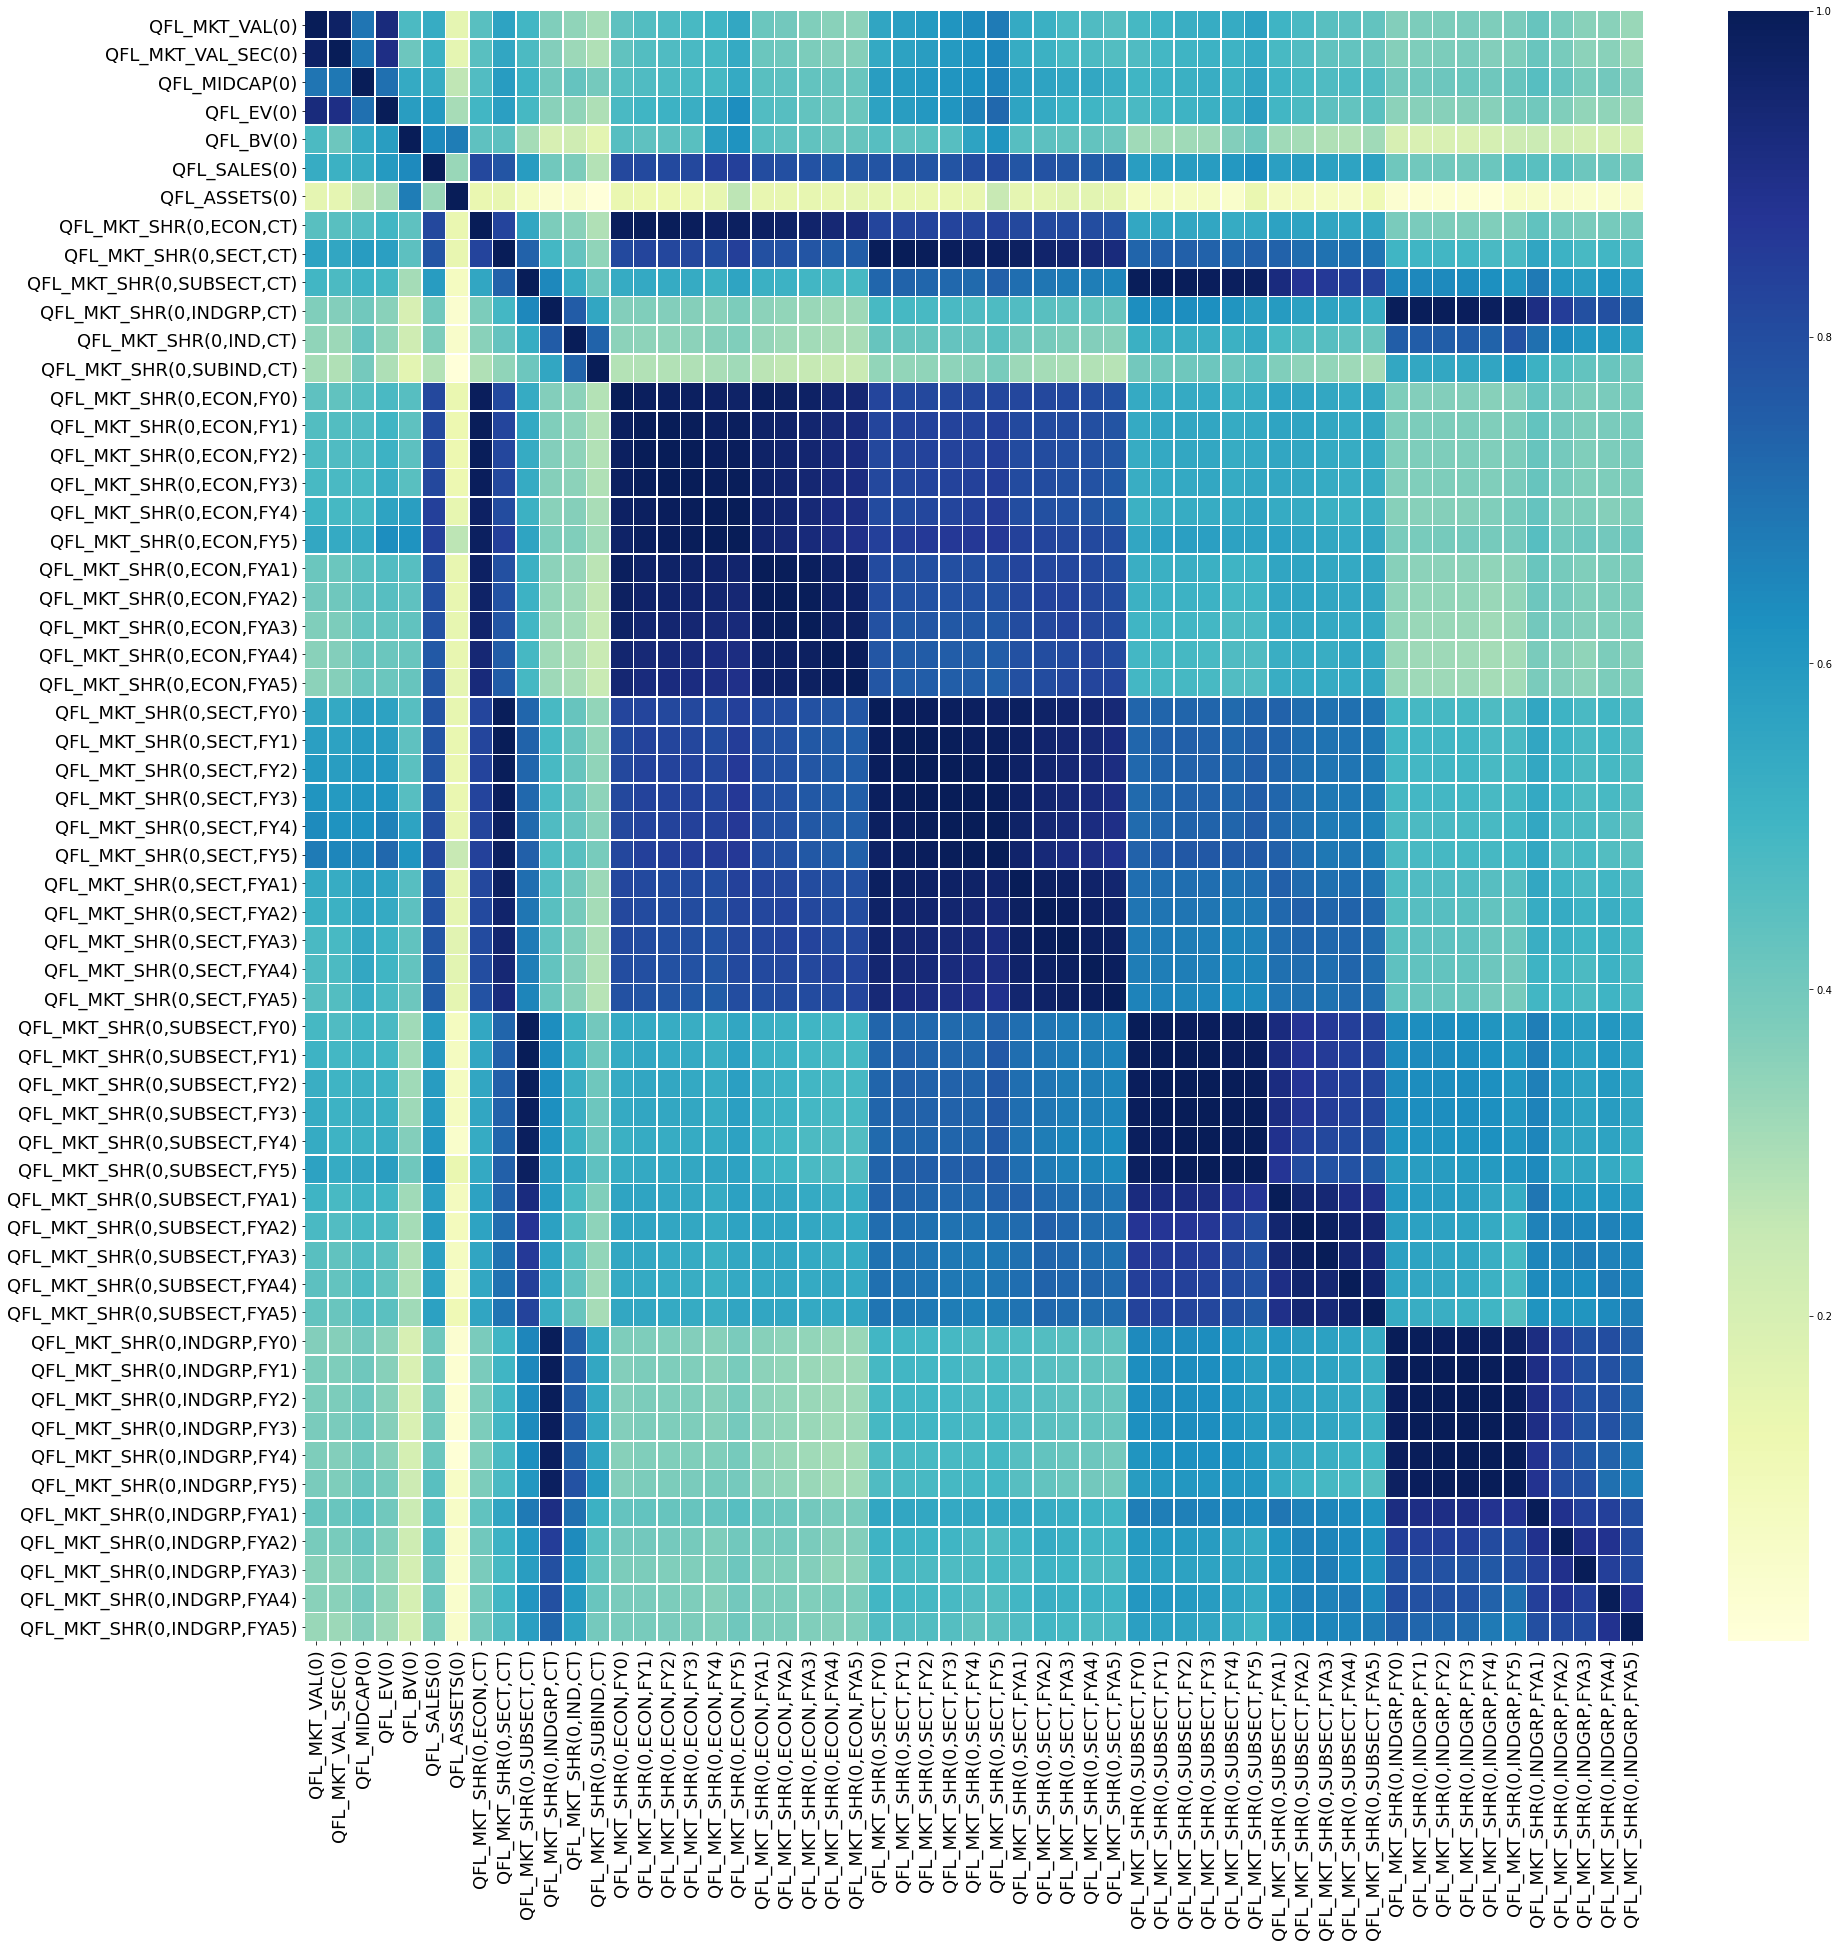

In [412]:
## Plot the correlation between each pair of factors

fig, ax = plt.subplots(figsize=(30,30))
hm = sns.heatmap(qfl_df[[c for c in qfl_df.columns[filter_idx]]].corr(), cmap="YlGnBu", annot = False, linewidths=.5, ax = ax)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18, rotation=0)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18, rotation=90)
plt.show()

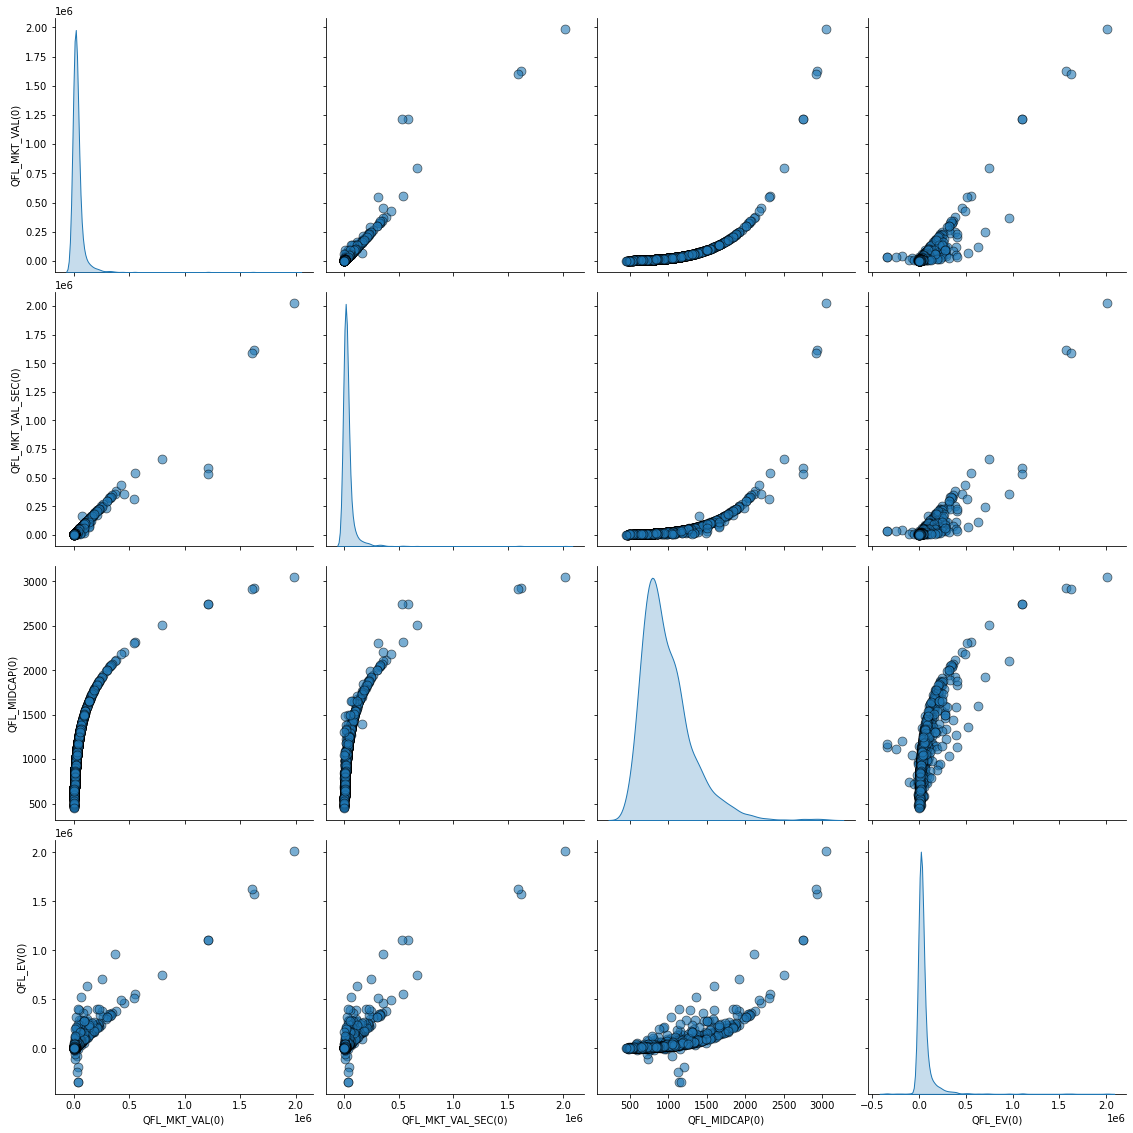

In [372]:
# Pairplot

sns.pairplot(qfl_df[qfl_df.columns[filter_idx[:4]].values], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 4);
#plt.show()

In [373]:
qfl_df[qfl_df.columns[filter_idx[:4]].values]

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0)
0,1.982240e+06,2.024064e+06,3048.45950,2.013539e+06
1,1.627246e+06,1.618475e+06,2925.67920,1.572484e+06
2,1.603266e+06,1.589568e+06,2916.57760,1.630678e+06
3,7.912842e+05,6.658273e+05,2505.15630,7.465862e+05
4,1.210822e+06,5.808104e+05,2748.00630,1.105768e+06
...,...,...,...,...
1595,3.183431e+03,2.688358e+03,524.72120,7.113576e+03
1596,2.619299e+03,2.619299e+03,487.56638,-4.840637e+03
1597,2.639926e+03,2.634849e+03,489.02567,6.234579e+03
1598,2.808475e+03,2.808475e+03,500.64124,3.422925e+03


In [374]:
# Other Statistics

advanced_describe = {}
stats_table = pd.DataFrame()
for factor in list(qfl_df.columns[filter_idx].values):
    advanced_describe[factor] = stats.describe(qfl_df[factor].dropna(), axis=0)    
    adv_stats = {keys: [np.round(series, 2) for series in values] for (keys, values) in zip(advanced_describe.keys(), advanced_describe.values())}
    stats_table = pd.DataFrame(adv_stats, index=['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']).T
stats_table

,nobs,minmax,mean,variance,skewness,kurtosis
QFL_MKT_VAL(0),1598,"[2063.38, 1982240.1]",37025.9,1.00283e+10,12.3,191.08
QFL_MKT_VAL_SEC(0),1598,"[2063.38, 2024064.4]",34894.2,8.37391e+09,13.75,249.94
QFL_MIDCAP(0),1598,"[444.56, 3048.46]",977.04,106121,1.57,4.38
QFL_EV(0),1598,"[-346960.6, 2013539.1]",48361.3,1.25648e+10,9.02,119.5
QFL_BV(0),1598,"[-12092.0, 415155.0]",13401.5,6.51317e+08,6.2,60.17
QFL_SALES(0),1596,"[-726.96, 548743.0]",18003.1,1.18449e+09,5.88,54.56
QFL_ASSETS(0),1598,"[180.29, 3301698.8]",86855.7,7.65828e+10,7.1,60.81
"QFL_MKT_SHR(0,ECON,CT)",1596,"[-0.0, 6.72]",0.29,0.35,5.47,39.92
"QFL_MKT_SHR(0,SECT,CT)",1596,"[-0.03, 11.66]",0.66,1.29,4.56,28.61
"QFL_MKT_SHR(0,SUBSECT,CT)",1596,"[-0.03, 31.65]",1.53,7.66,4.82,32.51


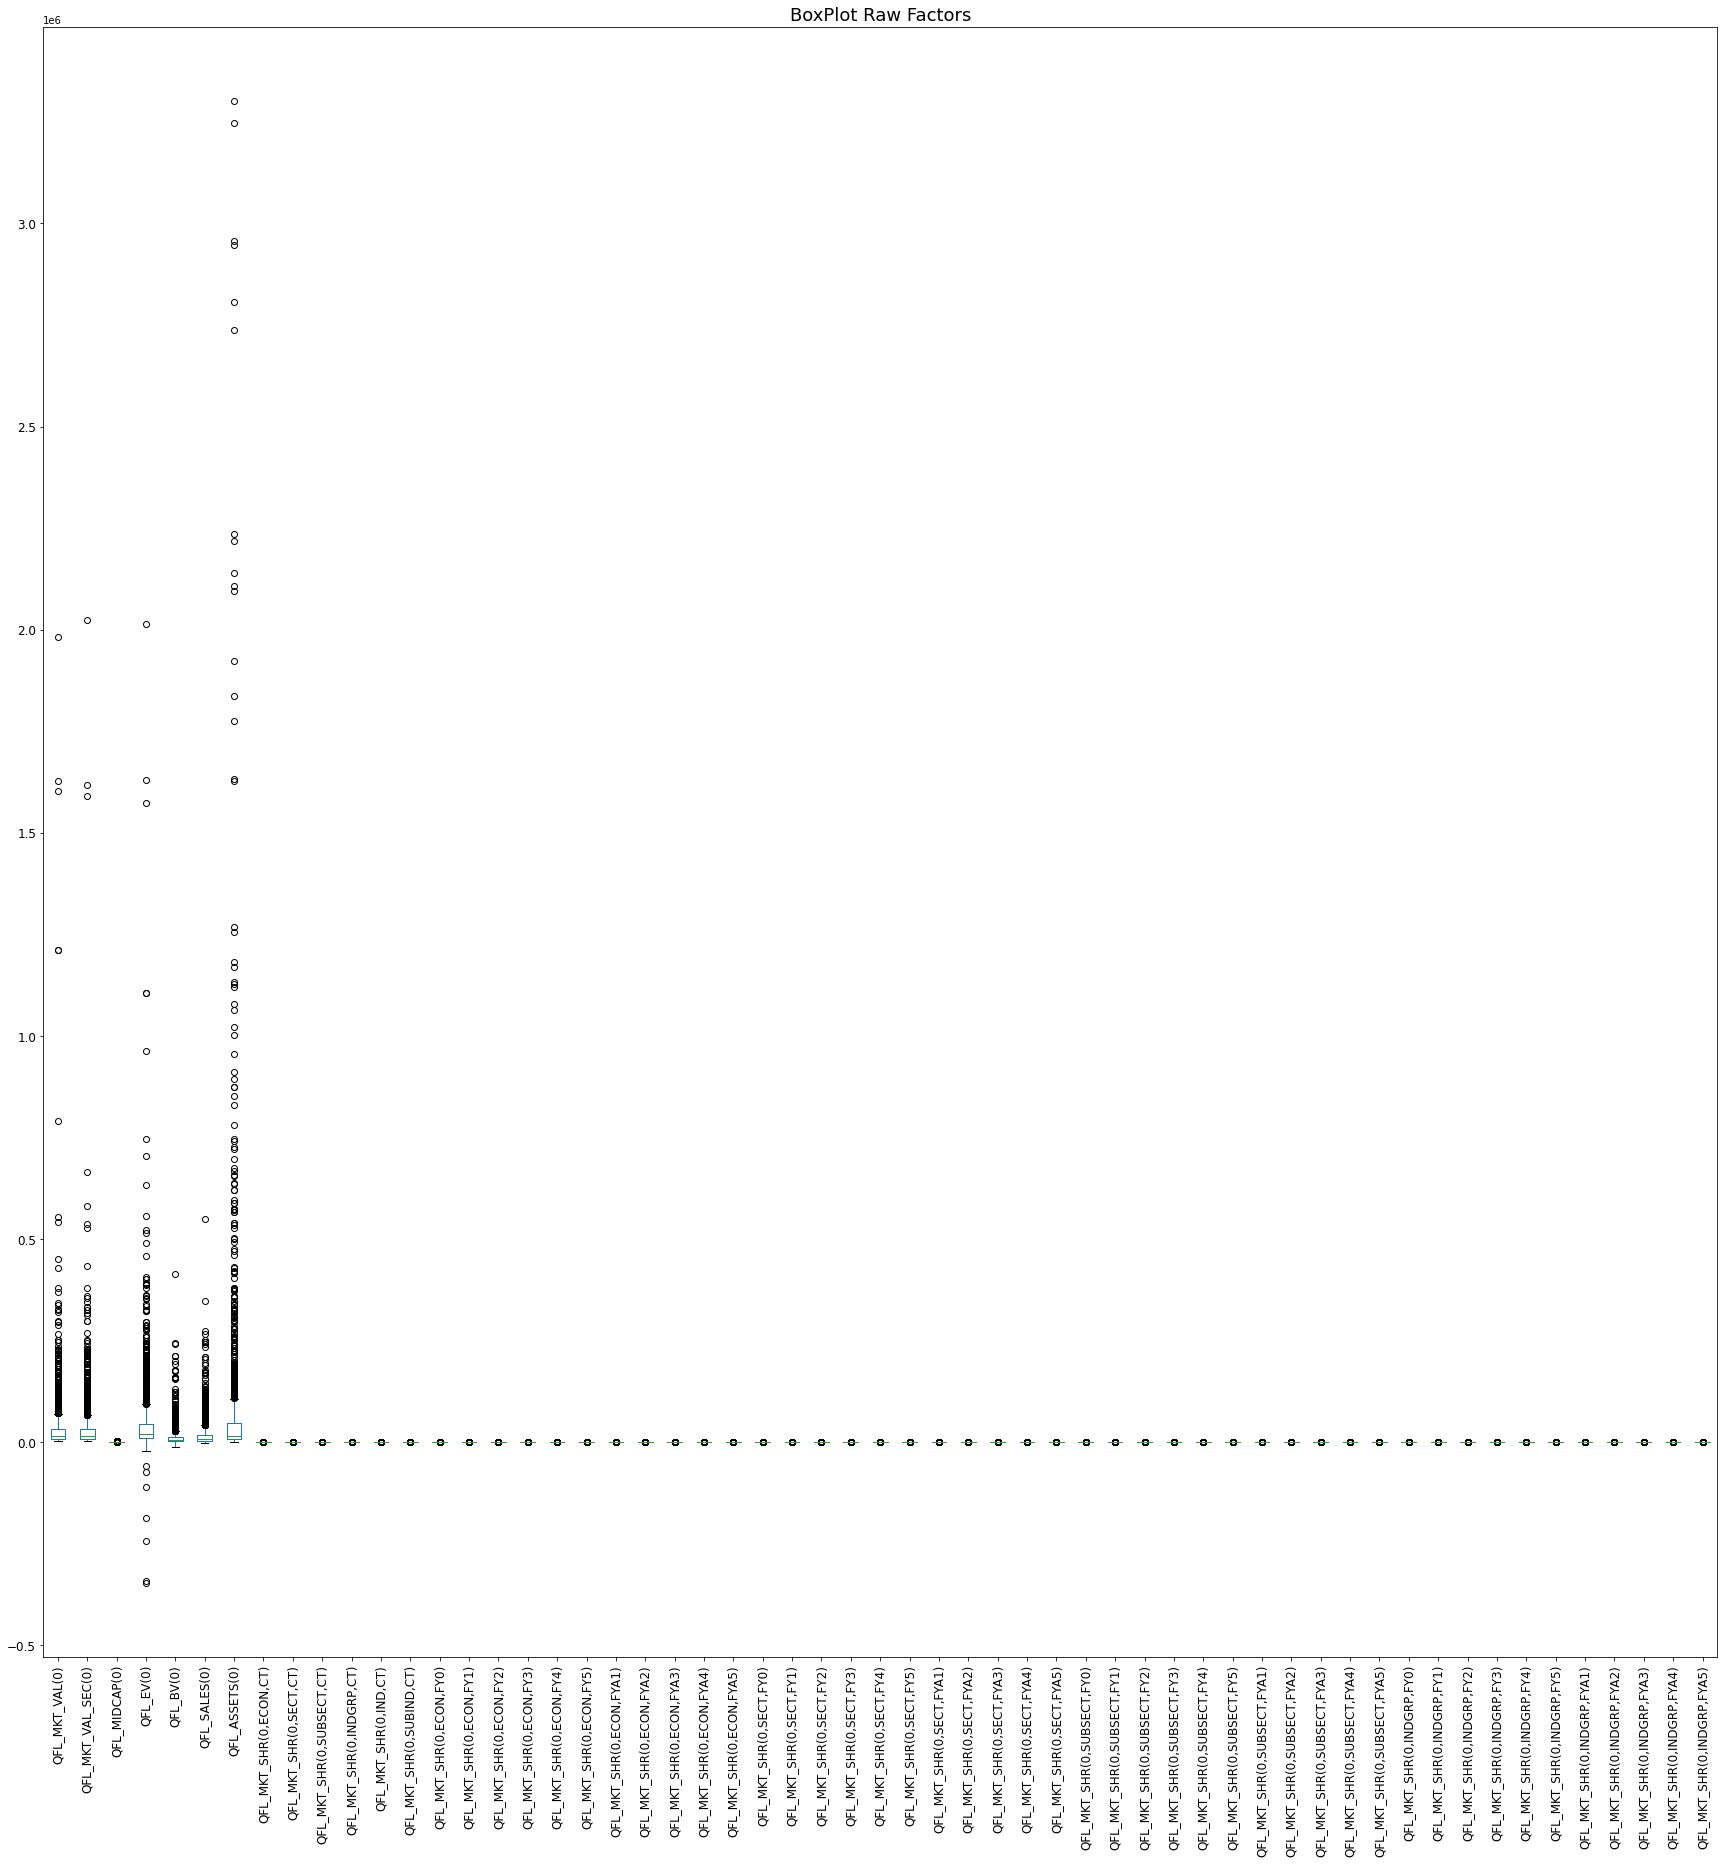

In [375]:
# Box-Whisker plot

qfl_df[qfl_df.columns[filter_idx]].boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('BoxPlot Raw Factors', fontsize = 18);

In [376]:
# Z-Score

qfl_df_z = pd.DataFrame()

for factor in qfl_df[qfl_df.columns[filter_idx]]:
    z_score = ( qfl_df[factor] - qfl_df[factor].mean() ) / qfl_df[factor].std()
    qfl_df_z[factor] = z_score

qfl_df_z.describe()

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
count,1.598000e+03,1.598000e+03,1.598000e+03,1.598000e+03,1.598000e+03,1.596000e+03,1.598000e+03,1.596000e+03,1.596000e+03,1.596000e+03,1.596000e+03,1.595000e+03,1.595000e+03,1.596000e+03,1.587000e+03,1.587000e+03,1.579000e+03,1.199000e+03,8.730000e+02,1.593000e+03,1.595000e+03,1.587000e+03,1.563000e+03,1.542000e+03,1.596000e+03,1.587000e+03,1.587000e+03,1.579000e+03,1.199000e+03,8.730000e+02,1.593000e+03,1.595000e+03,1.587000e+03,1.563000e+03,1.542000e+03,1.596000e+03,1.587000e+03,1.587000e+03,1.579000e+03,1.199000e+03,8.730000e+02,1.593000e+03,1.595000e+03,1.587000e+03,1.563000e+03,1.542000e+03,1.596000e+03,1.587000e+03,1.587000e+03,1.579000e+03,1.199000e+03,8.730000e+02,1.593000e+03,1.595000e+03,1.587000e+03,1.563000e+03,1.542000e+03
mean,-5.864104e-16,-2.702608e-17,3.733073e-15,-1.076180e-15,-1.232466e-15,-1.134083e-15,1.721263e-16,-5.992839e-16,1.088659e-15,4.381068e-16,-7.909296e-17,-3.189716e-17,-3.632761e-16,1.018435e-15,2.634594e-16,9.629628e-17,4.934832e-16,-1.528478e-15,-3.993242e-17,5.077197e-16,5.442529e-16,1.195571e-16,4.068332e-16,-5.292279e-16,-1.969324e-16,-9.458233e-17,-2.098720e-19,2.947470e-16,1.163929e-16,1.114038e-16,-4.459709e-16,3.885433e-16,-2.126004e-16,8.487559e-16,1.756197e-15,-1.871728e-15,4.460480e-16,-4.027444e-16,-4.357221e-16,9.887374e-16,2.175935e-16,1.101581e-15,7.209141e-16,-2.042754e-17,-7.505193e-16,1.477129e-15,1.435777e-16,5.666895e-16,-1.346469e-15,-2.155548e-15,1.046471e-15,1.368894e-15,2.572052e-16,9.130627e-16,7.466897e-16,5.553246e-16,-3.455947e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.491309e-01,-3.587711e-01,-1.634567e+00,-3.526731e+00,-9.989257e-01,-5.442200e-01,-3.132060e-01,-4.914081e-01,-6.046376e-01,-5.618467e-01,-5.786002e-01,-7.050129e-01,-8.457253e-01,-4.844471e-01,-4.788563e-01,-4.806792e-01,-4.813023e-01,-4.856068e-01,-4.919610e

In [377]:
# look for "extremely large" column's values after normalization (Descending)

for col_z in qfl_df_z:
    qfl_df_z[col_z] = qfl_df_z[col_z].sort_values(ignore_index=True, ascending = False)
    
qfl_df_z

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
0,19.424641,21.737407,6.358675,17.531669,15.742130,15.421144,11.617004,10.847524,9.682794,10.886863,11.243481,7.069800,5.183544,11.486451,10.334400,10.149916,9.859069,8.354833,8.029034,11.188373,11.339364,11.831625,10.676480,10.037263,9.318581,9.648785,9.600711,9.627926,8.883509,8.431411,9.620814,9.983280,10.404468,10.456427,10.343357,11.510182,10.559801,10.732590,10.850993,11.406453,10.444735,9.696325,9.391569,9.197230,9.036826,9.964985,11.805986,11.390294,11.361182,11.279644,10.883173,10.089147,10.687951,9.213779,9.179081,8.814569,9.221706
1,15.879714,17.305180,5.981773,14.116102,9.091427,9.586799,11.416008,10.506191,9.541654,10.466434,9.781963,6.991717,5.166051,9.971843,10.103130,9.596563,9.606912,8.180090,7.253275,10.030108,10.192953,10.420002,10.526489,9.276158,8.886359,9.375360,8.838527,8.628419,7.530037,7.247514,8.640797,9.055482,8.773647,9.232251,10.162609,9.924947,10.349651,10.332163,10.301401,9.390316,8.893322,8.689414,8.935492,8.993652,8.785331,9.178468,9.953214,9.839423,9.517396,9.361356,8.110080,8.008626,9.324914,8.914322,8.859646,8.758002,8.701648
2,15.640256,16.989282,5.953834,13.596950,8.920077,7.442587,10.367569,9.696537,8.685581,8.539866,9.604596,6.761942,5.112767,9.457148,9.285027,9.391404,9.353610,7.965335,7.240728,9.416661,9.424855,9.406800,9.435617,9.055262,8.488163,9.245314,8.829605,8.574231,7.413729,7.008270,8.601023,8.188007,8.250292,8.310824,8.374927,8.176132,8.250417,8.232046,8.241371,7.670576,7.325242,8.304253,8.746331,8.913827,8.780900,8.412524,8.334193,8.267617,8.271348,8.217426,8.049639,7.427018,7.379236,7.940582,8.640274,8.561526,8.365050
3,11.721367,6.894759,5.436367,9.433297,7.817844,7.205665,10.331701,8.984928,8.623077,7.485211,6.938423,6.284009,5.083006,9.284084,8.646778,8.672250,8.560093,7.366360,6.582920,9.110855,9.064858,8.715481,9.431751,8.670372,8.451521,8.471079,8.241038,8.112043,7.249959,6.691485,8.069765,8.153199,8.218249,8.303040,8.221011,7.687222,8.229264,7.946342,7.929785,7.346204,6.333288,8.087975,8.415681,7.967583,8.649432,7.650883,7.246863,7.399607,7.948458,8.045109,6.829465,6.369115,7.025926,7.787894,7.869011,7.788987,8.252796
4,11.721367,5.965705,5.436367,9.433297,7.817844,6.815705,9.828997,8.950013,7.984349,7.419447,6.919764,6.139403,4.938290,9.030691,8.646496,8.418768,8.234060,7.309747,6.463592,8.917213,8.396862,8.531675,7.640508,8.097152,7.874884,7.688727,7.898805,8.094648,7.227680,6.447286,7.754778,7.835703,7.602530,6.703316,6.217770,7.593072,7.965058,7.700488,7.360487,6.669030,6.333288,7.963128,8.313184,7.442995,7.409458,7.36174

In [378]:
# look for "extremely large" column's values after normalization (Ascending)

for col_z in qfl_df_z:
    qfl_df_z[col_z] = qfl_df_z[col_z].sort_values(ignore_index=True, ascending = True)
    
qfl_df_z

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
0,-0.349131,-0.358771,-1.634567,-3.526731,-0.998926,-0.544220,-0.313206,-0.491408,-0.604638,-0.561847,-0.578600,-0.705013,-0.845725,-0.484447,-0.478856,-0.480679,-0.481302,-0.485607,-0.491961,-0.525131,-0.492882,-0.496168,-0.482698,-0.492503,-0.588872,-0.575140,-0.579922,-0.581017,-0.586853,-0.585478,-0.723169,-0.593690,-0.611250,-0.586662,-0.589778,-0.550920,-0.550730,-0.555072,-0.556970,-0.565064,-0.572479,-0.629191,-0.563720,-0.568768,-0.560707,-0.556047,-0.559767,-0.558264,-0.563048,-0.567571,-0.603028,-0.615986,-0.686363,-0.550877,-0.562004,-0.543684,-0.536548
1,-0.347748,-0.357257,-1.599416,-3.476741,-0.988307,-0.523097,-0.312058,-0.484226,-0.580936,-0.552116,-0.558434,-0.687918,-0.833014,-0.484370,-0.478486,-0.480679,-0.481302,-0.484392,-0.489348,-0.508724,-0.492815,-0.492277,-0.482698,-0.492503,-0.588743,-0.574882,-0.579922,-0.581017,-0.583100,-0.581863,-0.664852,-0.593592,-0.598847,-0.586662,-0.589778,-0.550920,-0.549944,-0.555072,-0.556970,-0.564371,-0.570660,-0.604838,-0.563494,-0.565082,-0.560707,-0.556047,-0.558204,-0.557941,-0.560305,-0.565139,-0.603025,-0.615877,-0.646815,-0.550425,-0.557783,-0.543684,-0.536548
2,-0.347474,-0.356958,-1.592667,-2.602254,-0.919605,-0.522622,-0.311695,-0.483840,-0.580289,-0.551593,-0.557704,-0.687079,-0.832331,-0.484370,-0.478486,-0.479853,-0.479849,-0.483552,-0.488281,-0.504242,-0.492444,-0.492157,-0.482697,-0.492503,-0.588743,-0.574882,-0.578999,-0.580087,-0.582510,-0.577097,-0.648922,-0.593120,-0.598205,-0.586655,-0.589776,-0.550557,-0.549944,-0.553941,-0.555601,-0.563054,-0.569424,-0.598186,-0.562709,-0.563543,-0.560704,-0.556047,-0.556866,-0.555290,-0.559590,-0.565139,-0.601525,-0.614475,-0.643324,-0.550137,-0.547886,-0.543676,-0.536546
3,-0.347193,-0.356651,-1.585790,-2.101935,-0.857085,-0.522622,-0.311395,-0.483740,-0.580204,-0.551204,-0.557350,-0.687000,-0.831103,-0.482938,-0.478360,-0.479119,-0.479427,-0.483044,-0.487961,-0.498357,-0.492444,-0.492147,-0.482687,-0.492467,-0.587881,-0.574679,-0.578621,-0.578050,-0.578998,-0.576672,-0.628003,-0.592915,-0.598190,-0.586572,-0.589728,-0.549620,-0.549158,-0.551893,-0.553675,-0.562250,-0.568383,-0.589451,-0.562709,-0.563531,-0.560668,-0.555952,-0.556628,-0.554830,-0.559590,-0.564963,-0.601229,-0.614276,-0.626341,-0.549616,-0.547879,-0.543665,-0.536279
4,-0.347012,-0.356453,-1.581394,-1.423237,-0.835413,-0.522544,-0.311328,-0.483740,-0.580204,-0.551204,-0.554824,-0.685348,-0.830953,-0.482894,-0.477714,-0.478427,-0.478994,-0.482813,-0.487590,-0.488605,-0.492207,-0.492126,-0.482633,-0.492406

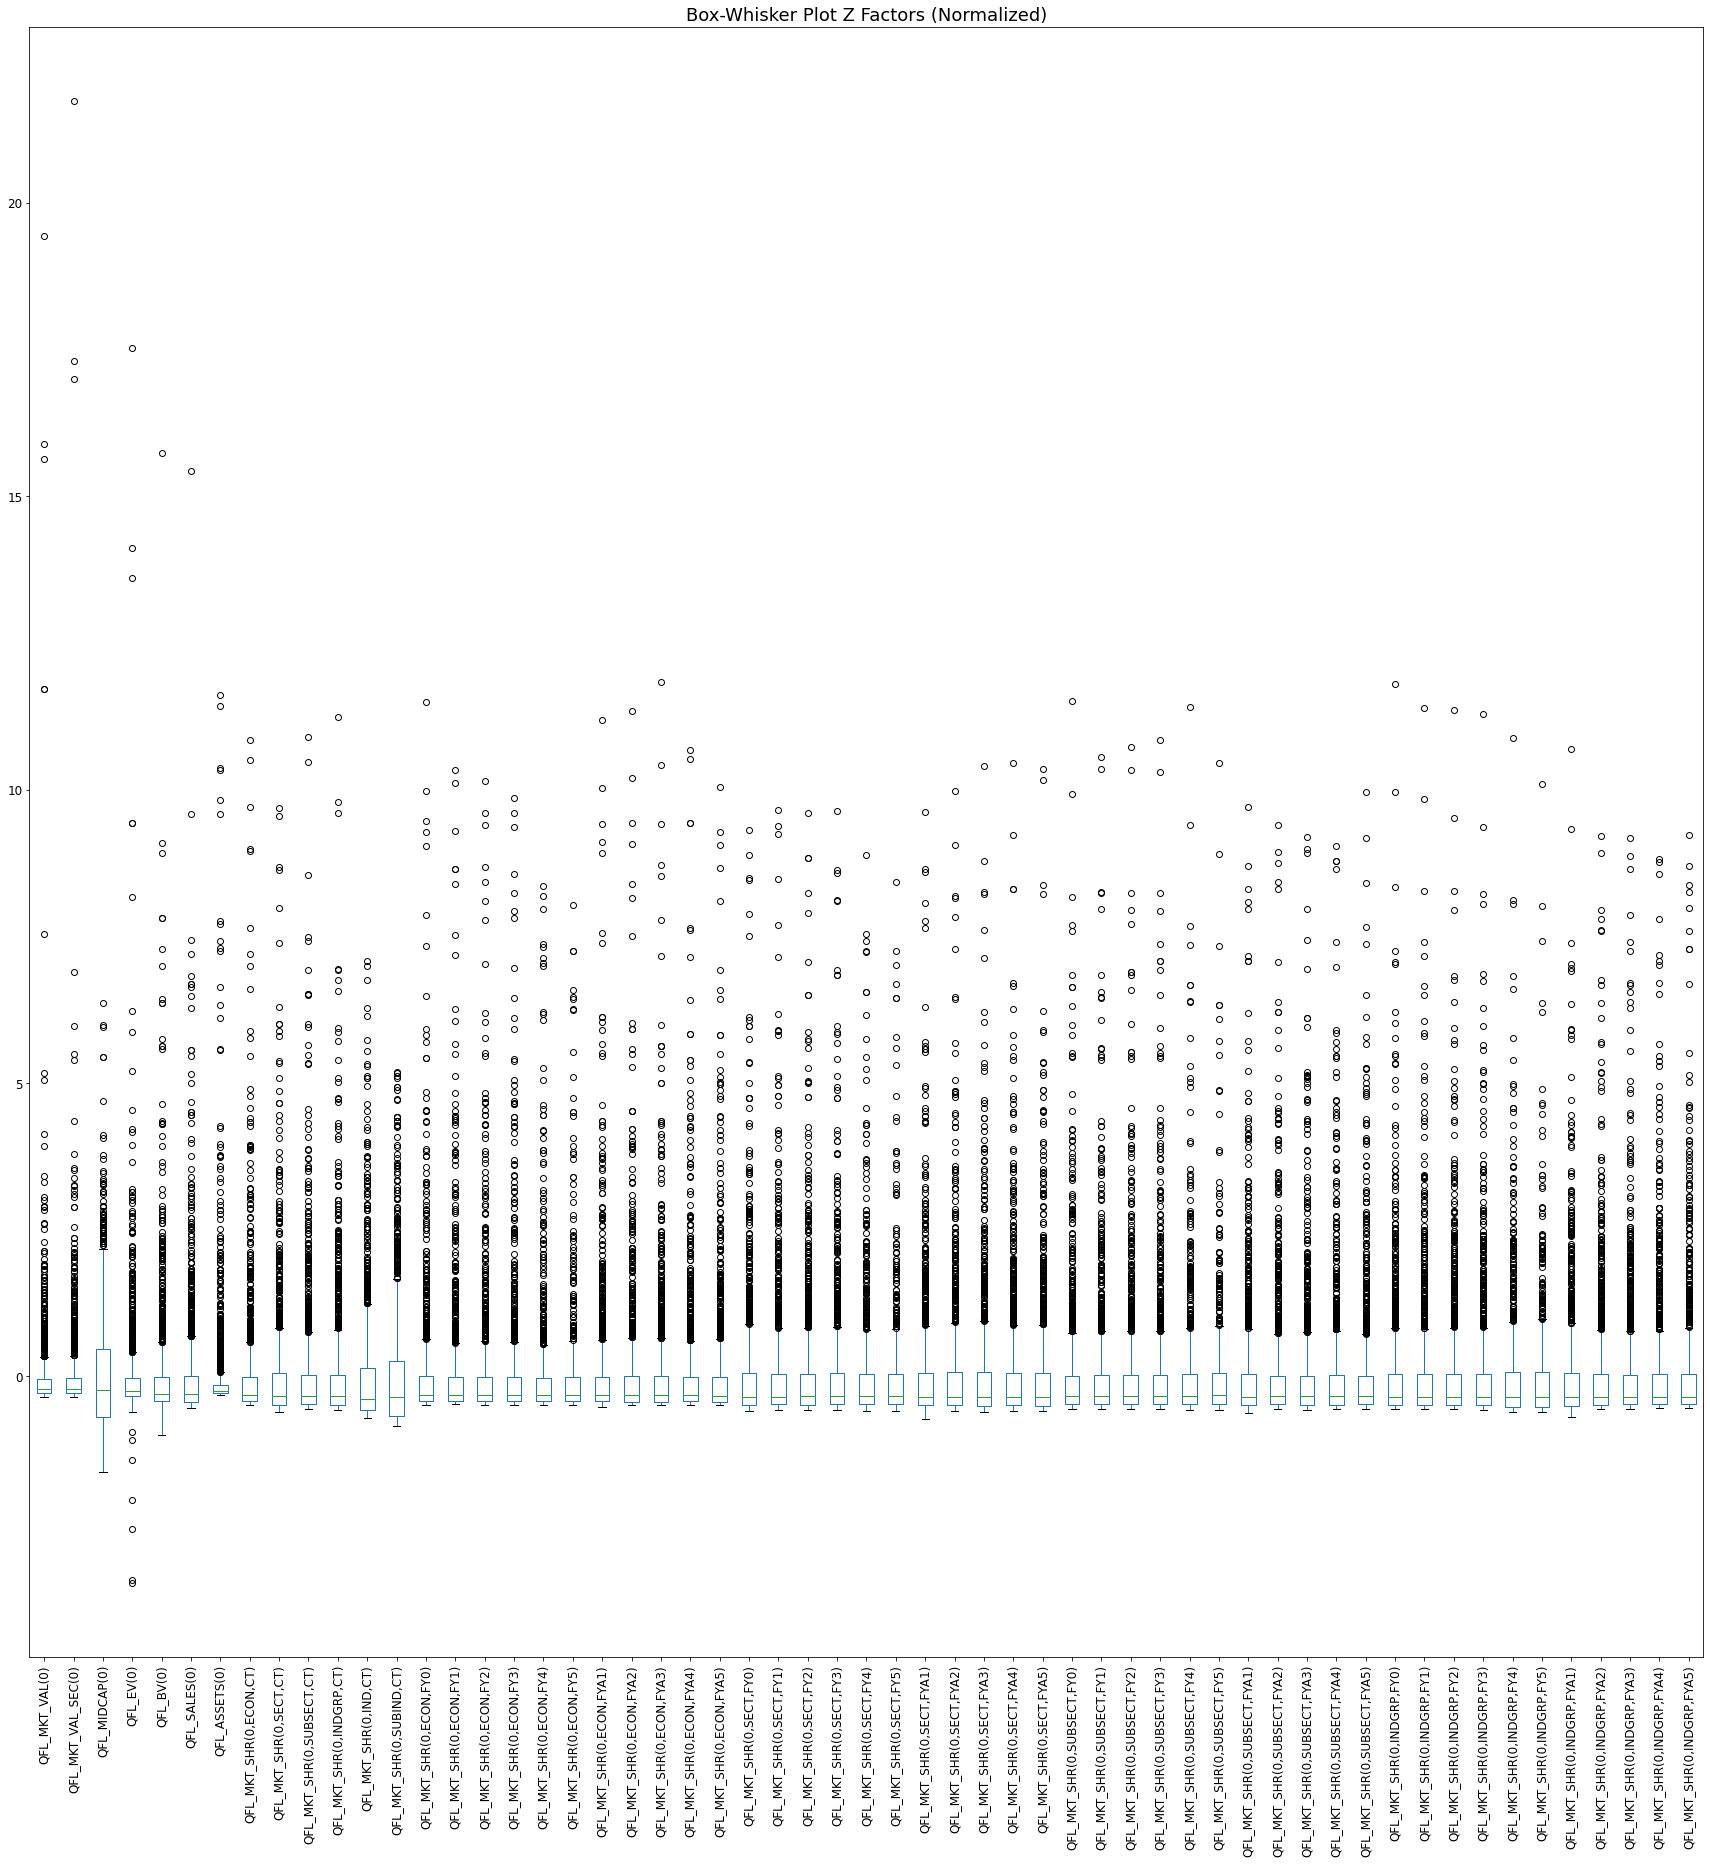

In [379]:
# Box-Whisker plot (Normalized data)

qfl_df_z.boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('Box-Whisker Plot Z Factors (Normalized)', fontsize = 18);

In [380]:
# Greedy Multi-Factor Simple Average from all Multi-Factor's components

# MFR Z-Score

qfl_df_z['MFR'] = qfl_df_z.mean(axis = 1)

qfl_df_z.head()

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)",MFR
0,-0.349131,-0.358771,-1.634567,-3.526731,-0.998926,-0.544220,-0.313206,-0.491408,-0.604638,-0.561847,-0.578600,-0.705013,-0.845725,-0.484447,-0.478856,-0.480679,-0.481302,-0.485607,-0.491961,-0.525131,-0.492882,-0.496168,-0.482698,-0.492503,-0.588872,-0.575140,-0.579922,-0.581017,-0.586853,-0.585478,-0.723169,-0.593690,-0.611250,-0.586662,-0.589778,-0.550920,-0.550730,-0.555072,-0.556970,-0.565064,-0.572479,-0.629191,-0.563720,-0.568768,-0.560707,-0.556047,-0.559767,-0.558264,-0.563048,-0.567571,-0.603028,-0.615986,-0.686363,-0.550877,-0.562004,-0.543684,-0.536548,-0.633047
1,-0.347748,-0.357257,-1.599416,-3.476741,-0.988307,-0.523097,-0.312058,-0.484226,-0.580936,-0.552116,-0.558434,-0.687918,-0.833014,-0.484370,-0.478486,-0.480679,-0.481302,-0.484392,-0.489348,-0.508724,-0.492815,-0.492277,-0.482698,-0.492503,-0.588743,-0.574882,-0.579922,-0.581017,-0.583100,-0.581863,-0.664852,-0.593592,-0.598847,-0.586662,-0.589778,-0.550920,-0.549944,-0.555072,-0.556970,-0.564371,-0.570660,-0.604838,-0.563494,-0.565082,-0.560707,-0.556047,-0.558204,-0.557941,-0.560305,-0.565139,-0.603025,-0.615877,-0.646815,-0.550425,-0.557783,-0.543684,-0.536548,-0.626070
2,-0.347474,-0.356958,-1.592667,-2.602254,-0.919605,-0.522622,-0.311695,-0.483840,-0.580289,-0.551593,-0.557704,-0.687079,-0.832331,-0.484370,-0.478486,-0.479853,-0.479849,-0.483552,-0.488281,-0.504242,-0.492444,-0.492157,-0.482697,-0.492503,-0.588743,-0.574882,-0.578999,-0.580087,-0.582510,-0.577097,-0.648922,-0.593120,-0.598205,-0.586655,-0.589776,-0.550557,-0.549944,-0.553941,-0.555601,-0.563054,-0.569424,-0.598186,-0.562709,-0.563543,-0.560704,-0.556047,-0.556866,-0.555290,-0.559590,-0.565139,-0.601525,-0.614475,-0.643324,-0.550137,-0.547886,-0.543676,-0.536546,-0.608100
3,-0.347193,-0.356651,-1.585790,-2.101935,-0.857085,-0.522622,-0.311395,-0.483740,-0.580204,-0.551204,-0.557350,-0.687000,-0.831103,-0.482938,-0.478360,-0.479119,-0.479427,-0.483044,-0.487961,-0.498357,-0.492444,-0.492147,-0.482687,-0.492467,-0.587881,-0.574679,-0.578621,-0.578050,-0.578998,-0.576672,-0.628003,-0.592915,-0.598190,-0.586572,-0.589728,-0.549620,-0.549158,-0.551893,-0.553675,-0.562250,-0.568383,-0.589451,-0.562709,-0.563531,-0.560668,-0.555952,-0.556628,-0.554830,-0.559590,-0.564963,-0.601229,-0.614276,-0.626341,-0.549616,-0.547879,-0.543665,-0.536279,-0.596756
4,-0.347012,-0.356453,-1.581394,-1.423237,-0.835413,-0.522544,-0.311328,-0.483740,-0.580204,-0.551204,-0.554824,-0.685348,-0.830953,-0.482894,-0.477714,-0.478427,-0.478994,-0.482813,-0.487590,-0.48

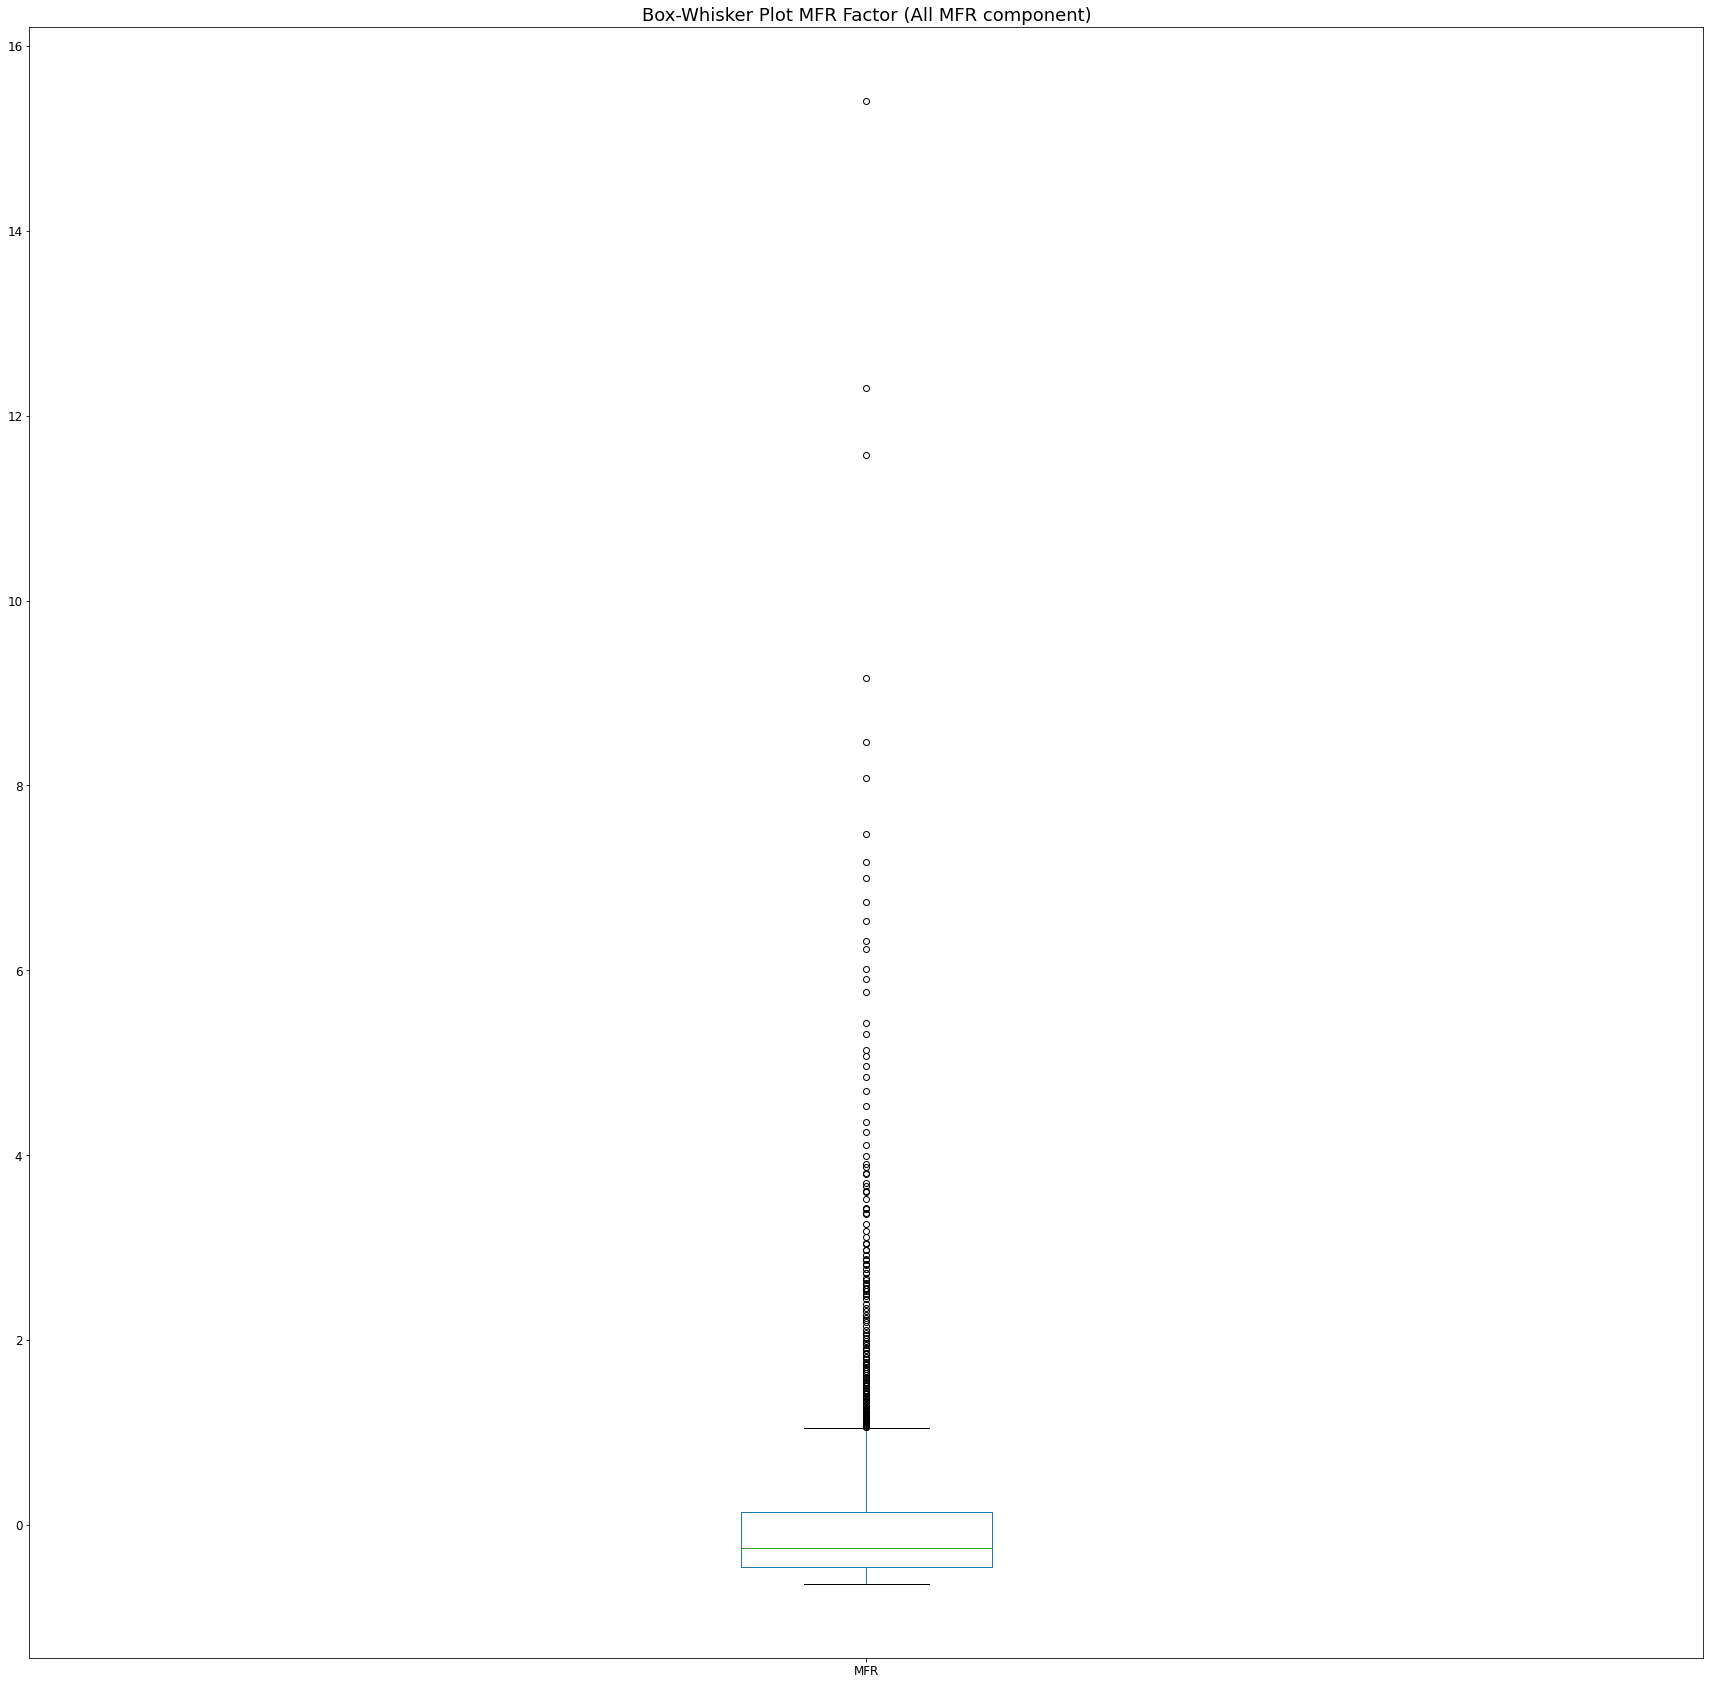

In [381]:
pd.DataFrame(qfl_df_z['MFR']).boxplot(grid=False, fontsize=12, figsize = (30,30)).set_title('Box-Whisker Plot MFR Factor (All MFR component)', fontsize = 18);

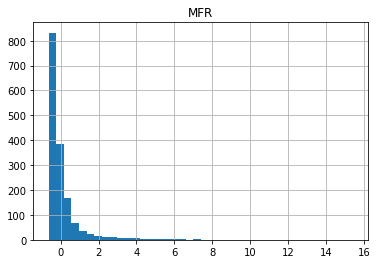

In [382]:
# MFR Distribution

pd.DataFrame(qfl_df_z['MFR']).hist(bins = int(np.sqrt(len(qfl_df_z['MFR']))));

In [408]:
# Check Infomation Coefficient: MFR (Components: All, Z-Scored Only)

sp_corr_z, sp_pval_z = stats.spearmanr(-qfl_df_z['MFR'].replace(np.nan, 0), qfl_df['p_total_return'].replace(np.nan, 0))
print('Information Coefficient: {0}'.format(round(sp_corr_z,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z,2)))

Information Coefficient: 0.05
Information Coefficient (P-Value): 0.04


C:\Users\ffais\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


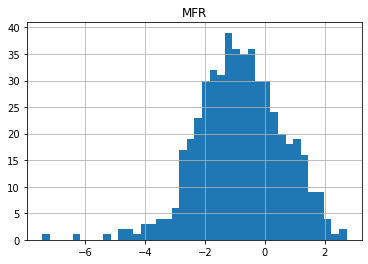

In [383]:
# MFR Log-Distribution

pd.DataFrame(np.log(qfl_df_z['MFR'])).hist(bins = int(np.sqrt(len(qfl_df_z['MFR']))));

In [384]:
# Log-Transformation for positive/not-zero features

qfl_df_log = pd.DataFrame()

for col_pos in qfl_df[qfl_df.columns[filter_idx]]:
    if np.sum(qfl_df[qfl_df.columns[filter_idx]][col_pos] <= 0) == 0:
        qfl_df_log[col_pos] = np.log(qfl_df[qfl_df.columns[filter_idx]][col_pos])
    else:
        qfl_df_log[col_pos] = qfl_df[qfl_df.columns[filter_idx]][col_pos]
    
qfl_df_log

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)"
0,14.499738,14.520618,8.022392,2.013539e+06,65339.0000,274150.00000,12.688153,4.815023,10.526321,22.238337,41.352060,53.235850,53.235850,1.588864,1.651539,1.621524,1.608031,1.636349,1.656731,4.810380,5.370616,5.093326,5.168695,5.553231,2.351456,2.440825,2.431494,2.437992,2.481679,2.522383,10.364318,10.989257,10.724171,10.497783,10.672603,3.105663,3.173861,3.162475,3.162830,3.190874,3.228544,23.283264,25.320470,22.874163,23.128052,24.448503,3.731587,3.769982,3.750887,3.742875,3.745840,3.779262,45.585050,47.206500,45.647140,45.030937,37.111700
1,14.302399,14.296995,7.981282,1.572484e+06,123392.0000,147114.00000,12.614869,2.583831,6.186372,16.286043,50.190857,49.598522,49.598522,0.936807,0.959302,0.983969,1.034495,NaN,NaN,2.265604,2.169726,1.992011,2.043462,2.232309,1.822544,1.826977,1.831457,1.856118,NaN,NaN,6.224180,6.201993,5.301732,5.667617,6.940536,2.811013,2.795115,2.795629,2.811417,NaN,NaN,16.916397,17.354431,15.915146,18.754684,16.667847,3.946179,3.892855,3.857204,3.838983,NaN,NaN,53.335120,66.884210,60.800846,66.780045,73.142780
2,14.287553,14.278973,7.978166,1.630678e+06,82775.0000,347946.00000,12.550297,3.195581,5.715496,11.333005,36.357197,52.501106,52.501106,0.931511,1.191554,1.304801,1.413851,1.524881,1.628008,2.292530,1.903947,1.358862,1.103372,0.853457,1.513965,1.763276,1.875532,1.979529,2.079472,2.173400,4.175713,3.552639,2.543111,2.044755,1.632877,2.208220,2.449679,2.538390,2.623325,2.705567,2.781859,8.215635,7.435212,5.515180,4.252454,3.471880,3.410106,3.609583,3.618136,3.651459,3.698319,3.742167,28.479729,26.655369,23.316036,19.620737,14.461966
3,13.581412,13.408786,7.826106,7.465862e+05,117731.0000,78976.00000,11.894351,1.387092,4.005616,11.202917,17.727758,26.381714,81.534874,0.232261,0.327439,0.464594,0.581212,0.697342,0.807799,1.033212,0.821385,0.615864,0.432554,0.299315,1.305410,1.382527,1.499495,1.590247,1.673609,1.754386,3.309749,2.742756,1.936496,1.495185,1.081028,2.369329,2.412054,2.494611,2.559314,2.602784,2.641084,9.816831,8.411394,7.180848,5.363460,4.307465,2.827744,2.874571,2.940136,2.994416,3.028450,3.059925,15.922623,13.910470,13.345402,10.204658,8.222286
4,14.006810,13.272180,7.918631,1.105768e+06,212920.0000,171435.00000,12.609011,2.589434,7.477716,19.573797,30.974033,71.250410,87.253710,0.909741,0.926190,1.032995,1.109744,1.222032,1.327306,2.164118,1.862990,1.654044,1.419589,1.246032,1.982890,1.981278,2.067895,2.118778,2.198299,2.273893,6.932447,6.220864,5.144555,4.870344,4.500253,2.980596,2.944592,2.996799,3.021633,3.061262,3.094379,20.561882,19.077

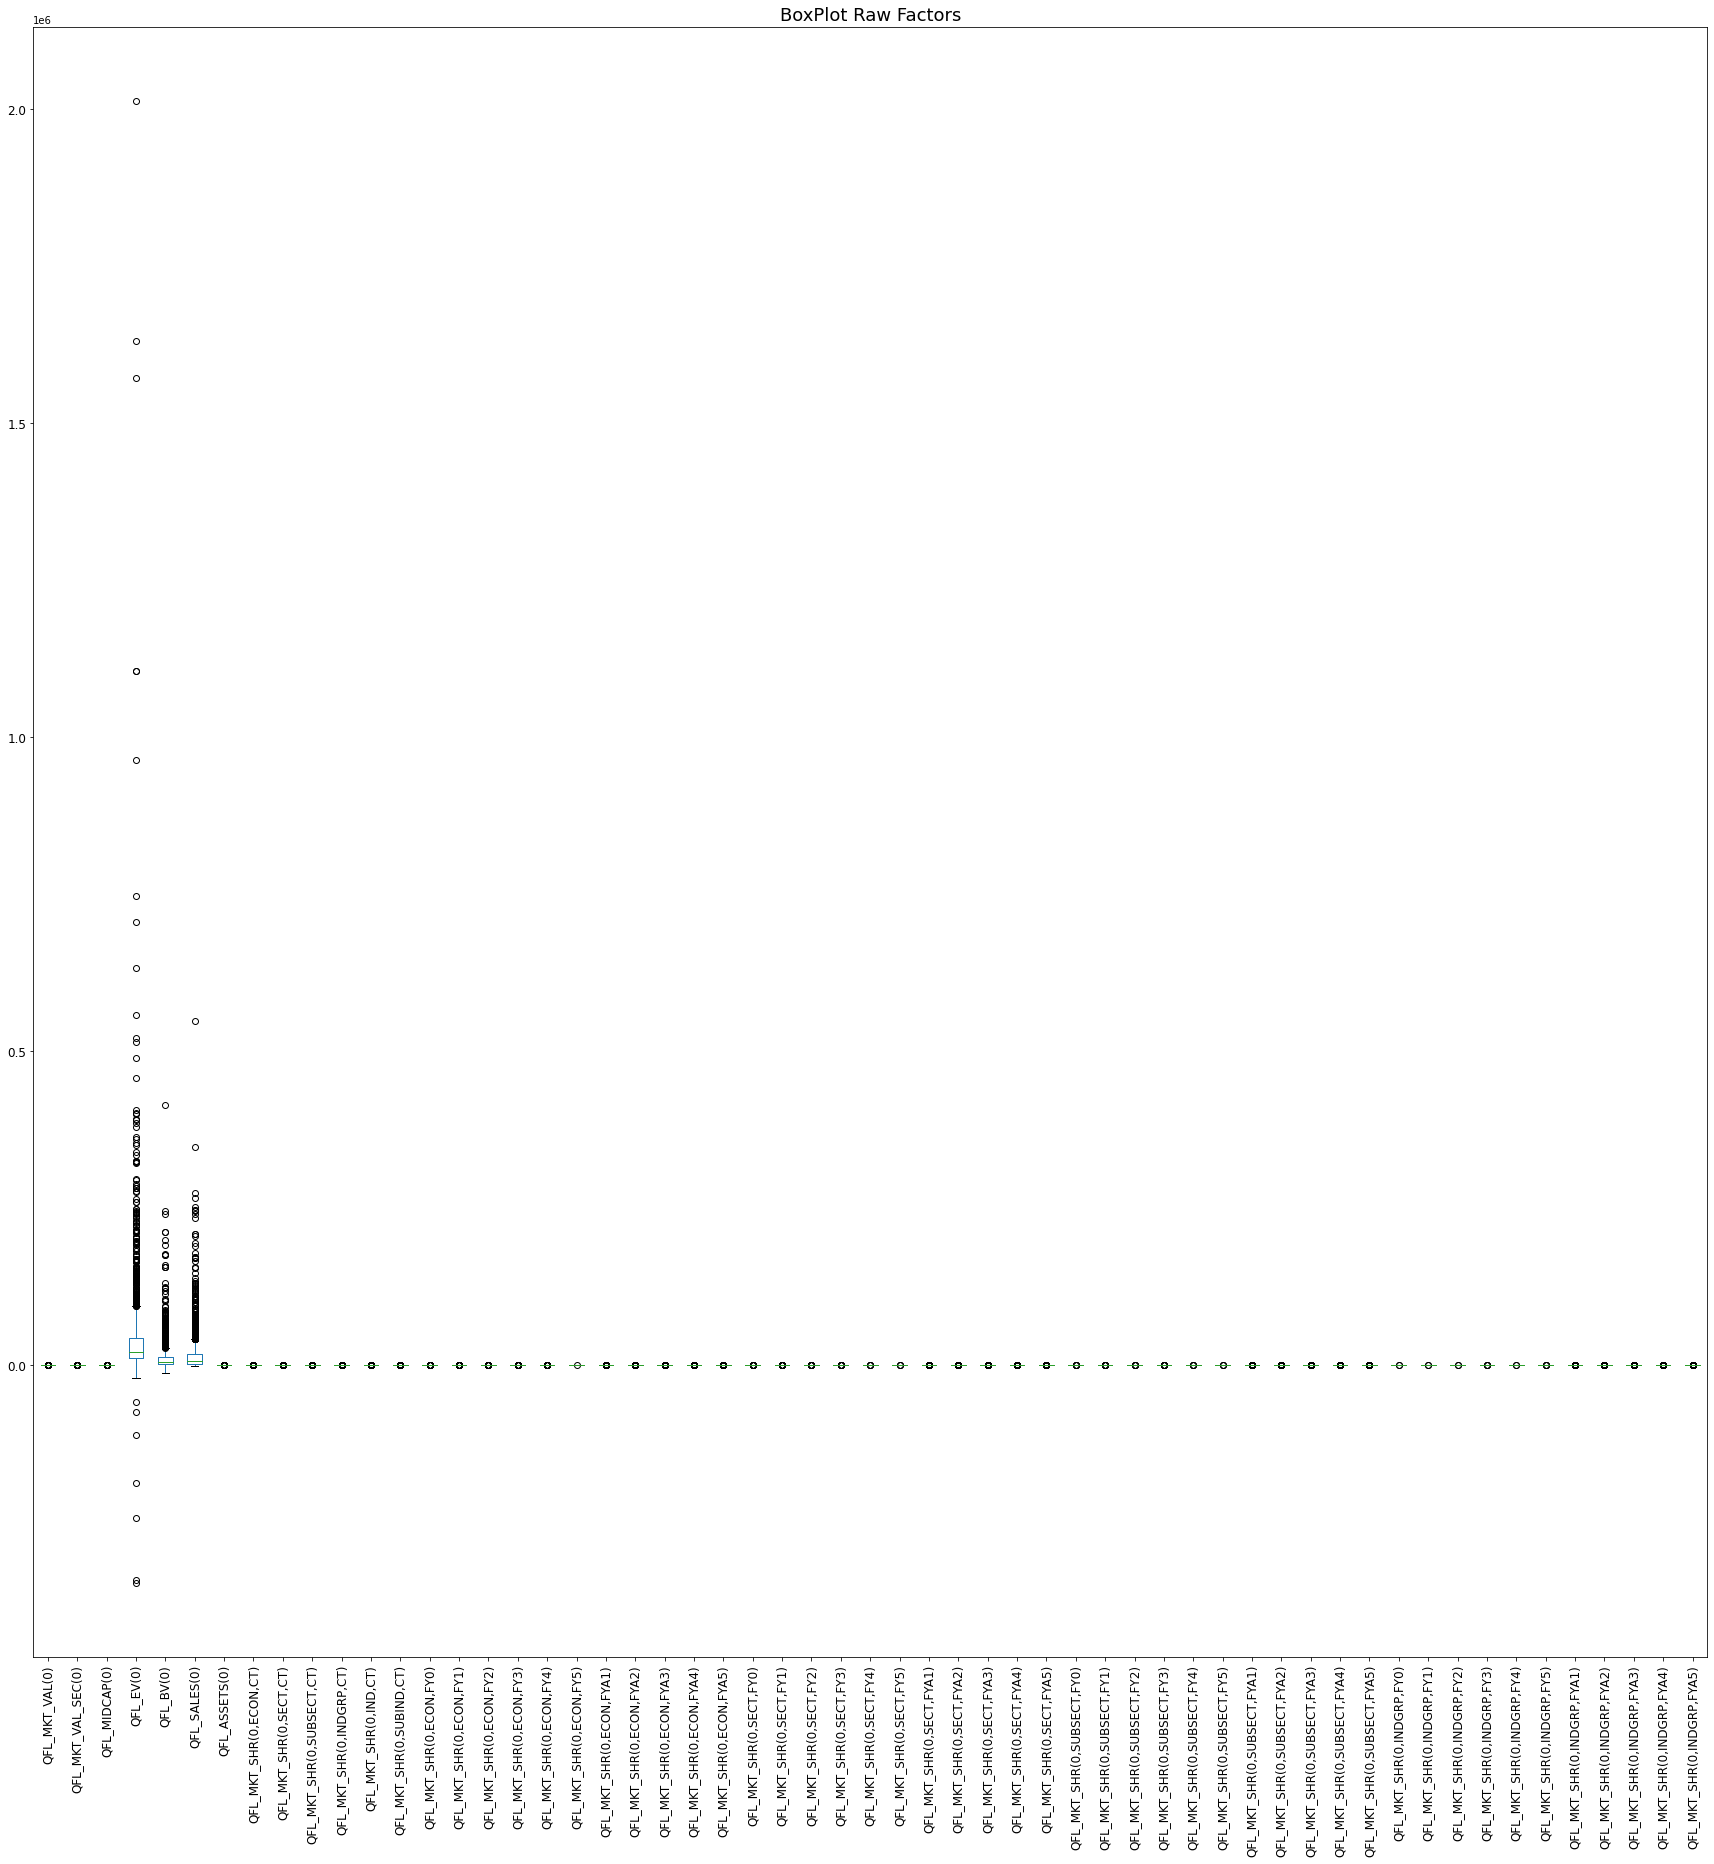

In [385]:
# Box-Whisker plot of Log-Transformed data

qfl_df_log.boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('BoxPlot Raw Factors', fontsize = 18);

In [386]:
# MFR Z-Score of Log-Transformed and Z-Scored data

# Z-Score of Log-Transformed data

qfl_df_log_z = pd.DataFrame()

for factor in qfl_df_log:
    z_score = ( qfl_df_log[factor] - qfl_df_log[factor].mean() ) / qfl_df_log[factor].std()
    qfl_df_log_z[factor] = z_score

qfl_df_log_z['MFR'] = qfl_df_log_z.mean(axis = 1)

qfl_df_log_z.head()

,QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)",MFR
0,4.600417,4.679988,3.908578,17.531669,2.035096,7.442587,1.832249,7.633815,8.685581,7.485211,4.742618,3.619973,2.370308,2.533799,2.605901,2.621928,2.625425,2.586981,2.510535,7.550570,8.396862,7.769471,7.603689,8.097152,2.635772,2.726144,2.760471,2.772331,2.755394,2.688425,8.640797,9.055482,8.773647,8.303040,8.221011,2.470504,2.527961,2.552081,2.558044,2.567368,2.522450,8.087975,8.415681,7.442995,7.409458,7.361741,2.211922,2.240329,2.248742,2.245429,2.205870,2.145322,5.917966,5.193494,4.895363,4.668479,3.584716,4.952225
1,4.406601,4.459554,3.773097,13.596950,4.309819,3.751437,1.783560,3.872066,4.865043,5.333947,5.875692,3.325638,2.151442,2.113812,2.154840,2.197384,2.239868,NaN,NaN,3.297570,3.098569,2.738984,2.714284,2.960399,2.255412,2.281684,2.316300,2.338927,NaN,NaN,4.951760,4.852001,4.034979,4.212773,5.139995,2.272760,2.272962,2.300364,2.315513,NaN,NaN,5.718966,5.590684,5.007162,5.902351,4.841931,2.356907,2.323401,2.321857,2.311932,NaN,NaN,7.025926,7.587997,6.702385,7.185857,7.585976,4.061823
2,4.392020,4.441788,3.762829,14.116102,2.718300,9.586799,1.740658,4.903466,4.450522,3.543832,4.102311,3.560517,2.326097,2.110400,2.306176,2.411024,2.494888,2.510343,2.491069,3.342570,2.658637,1.711985,1.243519,0.827612,2.033502,2.235560,2.348927,2.430849,2.449090,2.426921,3.126490,2.525722,1.624220,1.144872,0.758247,1.868217,2.040390,2.123857,2.185700,2.217994,2.200863,2.481552,2.073030,1.366910,0.904733,0.568341,1.994719,2.131888,2.157447,2.182173,2.171890,2.119081,3.472566,2.692709,2.232463,1.727343,1.069457,2.716512
3,3.698484,3.584007,3.261705,6.228977,4.088001,1.771624,1.304851,1.854386,2.945282,3.496816,1.714144,1.446913,4.073124,1.660016,1.743119,1.851535,1.935150,1.941380,1.935181,1.237914,0.866720,0.506805,0.194029,-0.029527,1.883523,1.959876,2.070569,2.140896,2.140001,2.112941,2.354880,1.814601,1.094099,0.679486,0.302667,1.976339,2.015058,2.093817,2.141522,2.144001,2.099513,3.077331,2.419213,1.949936,1.287597,0.838950,1.601256,1.634965,1.691180,1.727525,1.692903,1.636452,1.677386,1.141833,1.043503,0.637467,0.376539,1.908219
4,4.116288,3.449349,3.566626,9.433297,7.817844,4.458107,1.779668,3.881513,6.001837,6.522199,3.412226,5.077727,4.417239,2.096378,2.133265,2.230030,2.290453,2.302124,2.287271,3.127959,2.590843,2.190785,1.738239,1.434841,2.370723,2.393406,2.491321,2.534568,2.539583,2.502224,5.582856,4.868571,3.897622,3.537629,3.125415,2.386569,2.373601,2.438400,2.460595,2.474060,2.425859,7.075392,6.201892,6.113843,5.459869,5.251241,2.014248,1.995000,2.036540,2.047432,2.020736,1.95

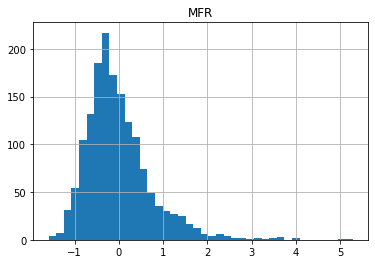

In [387]:
# MFR Distribution (of Log-Transformed and Z-Score factors)

pd.DataFrame(qfl_df_log_z['MFR']).hist(bins = int(np.sqrt(len(qfl_df_log_z['MFR']))));

In [407]:
# Check Infomation Coefficient: MRF (Components: All, Z-Scored & Log-Transformed)

sp_corr_z_log, sp_pval_z_log = stats.spearmanr(-qfl_df_log_z['MFR'].replace(np.nan, 0), qfl_df['p_total_return'].replace(np.nan, 0))
print('Information Coefficient: {0}'.format(round(sp_corr_z_log,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_log,2)))

Information Coefficient: -0.04
Information Coefficient (P-Value): 0.09


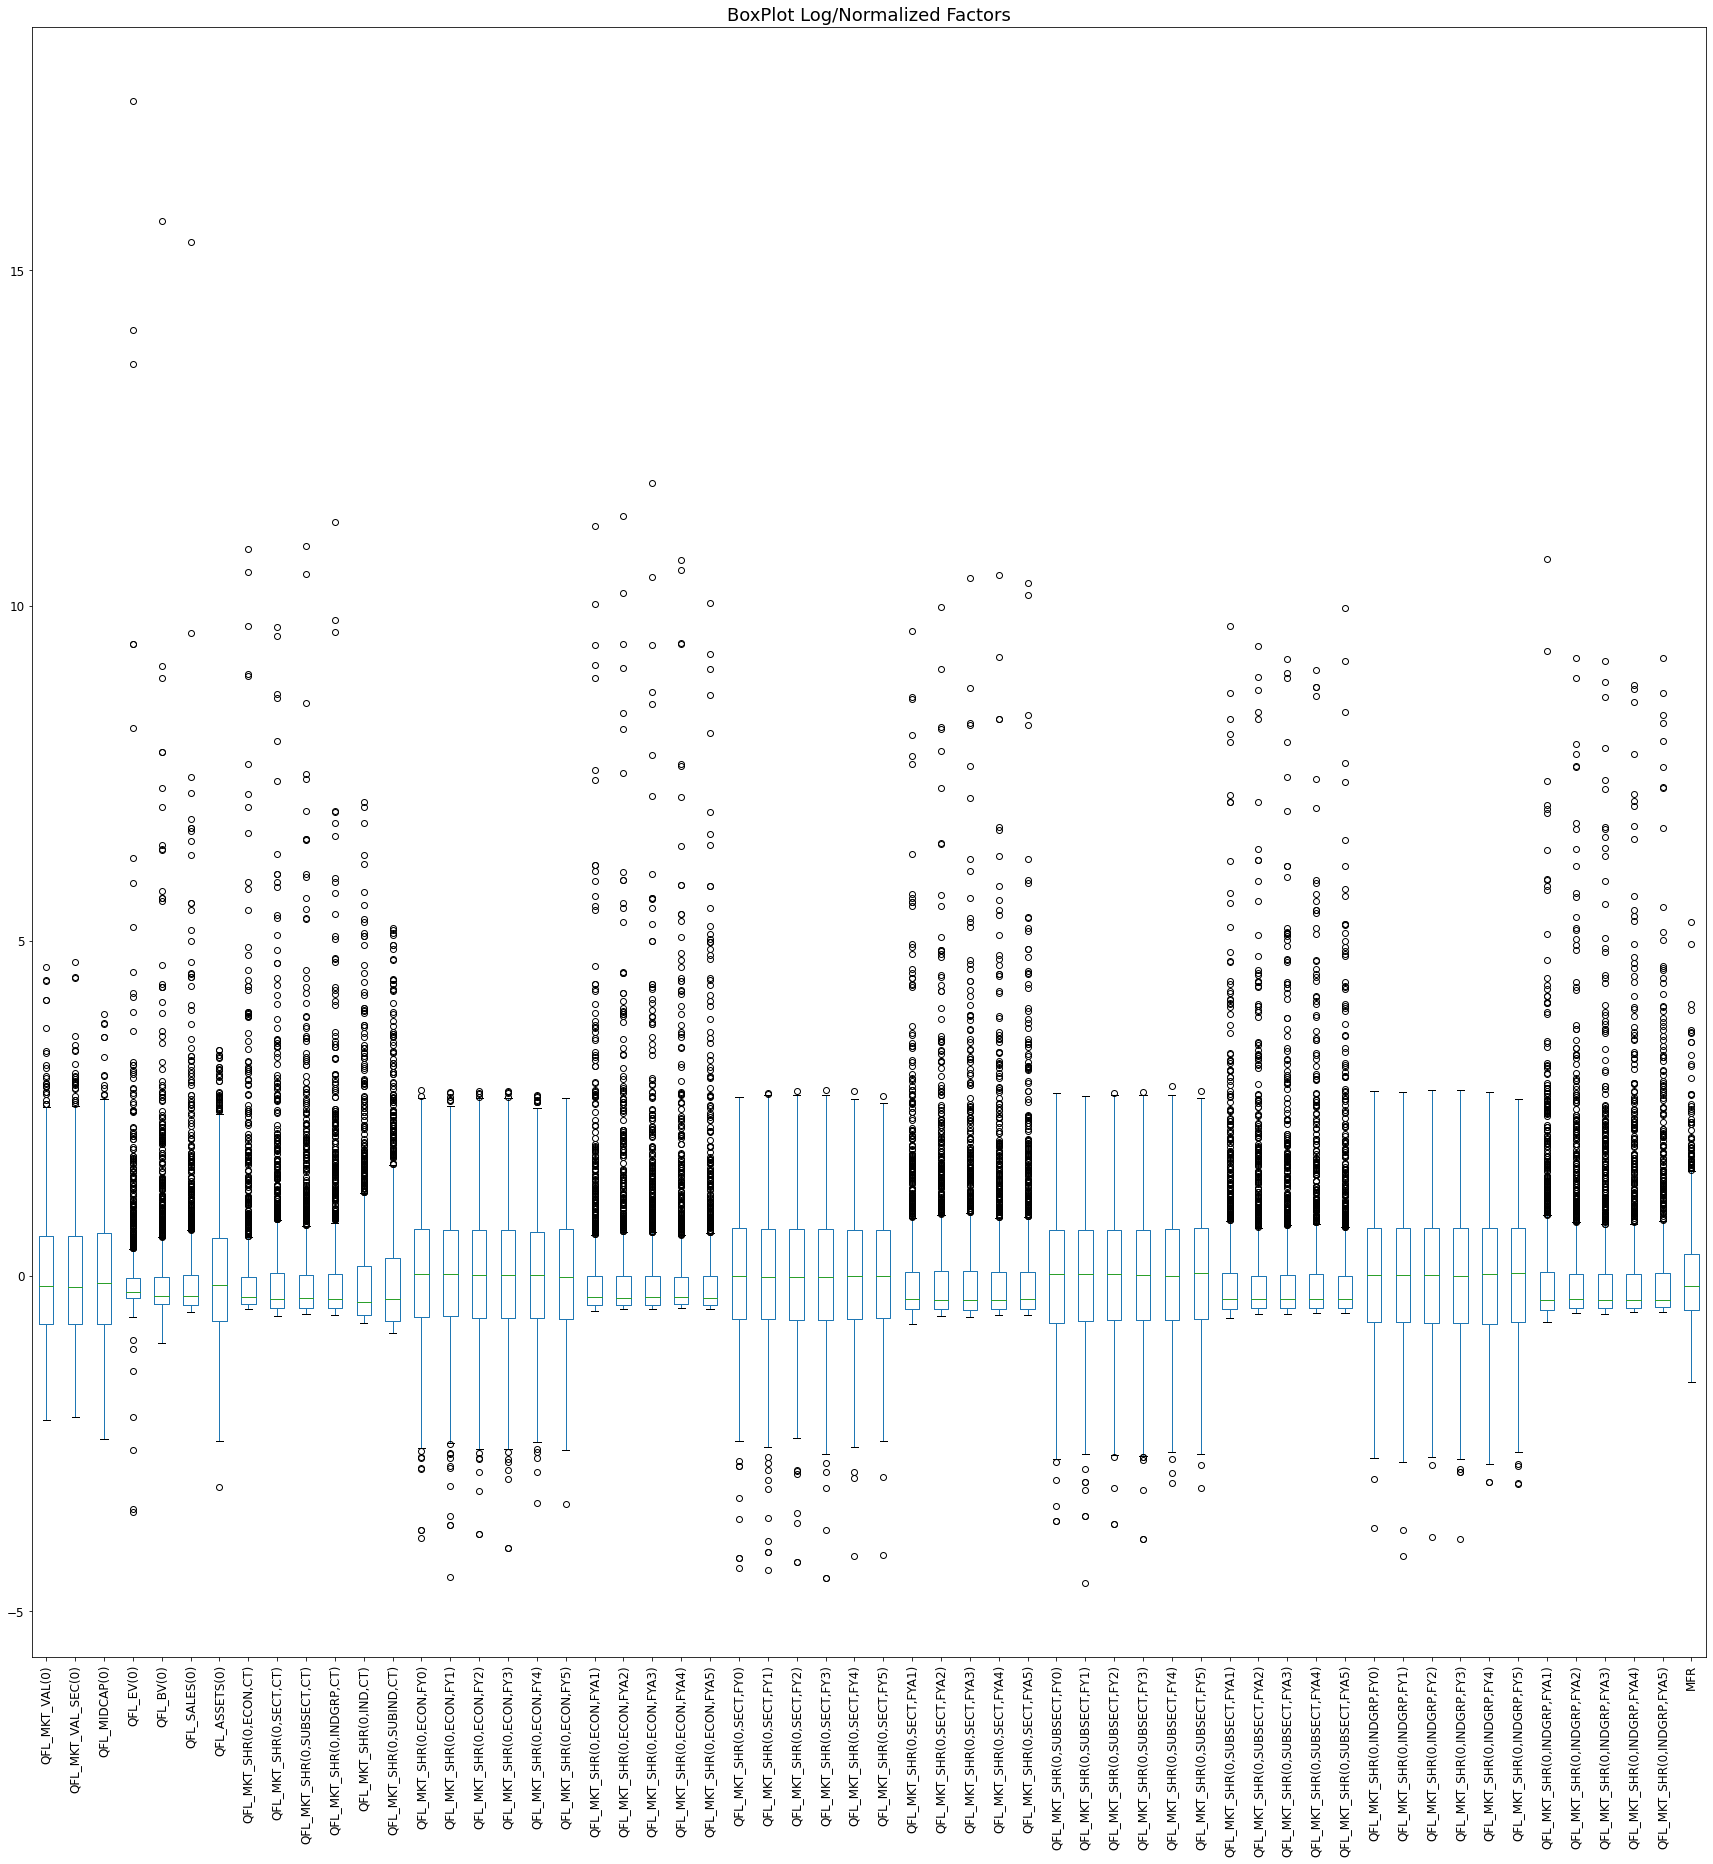

In [388]:
# Box-Whisker plot of Log-Transformed and Z-Score data

qfl_df_log_z.boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('BoxPlot Log/Normalized Factors', fontsize = 18);

In [389]:
# Check Universe Exposures (Geography, Size, Sector)

qfl_df['ison_screen'] = 1

qfl_df.head()

,BENCHMARK_ID,DATE,SECURITY_ID,Weight,proper_name,fg_gics_sector,proper,p_total_return,qfl_size_class,qfl_mkt_val_sec,QFL_SIZE_CLASS(0),QFL_MKT_VAL(0),QFL_MKT_VAL_SEC(0),QFL_MIDCAP(0),QFL_EV(0),QFL_BV(0),QFL_SALES(0),QFL_ASSETS(0),"QFL_MKT_SHR(0,ECON,CT)","QFL_MKT_SHR(0,SECT,CT)","QFL_MKT_SHR(0,SUBSECT,CT)","QFL_MKT_SHR(0,INDGRP,CT)","QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,ECON,FY0)","QFL_MKT_SHR(0,ECON,FY1)","QFL_MKT_SHR(0,ECON,FY2)","QFL_MKT_SHR(0,ECON,FY3)","QFL_MKT_SHR(0,ECON,FY4)","QFL_MKT_SHR(0,ECON,FY5)","QFL_MKT_SHR(0,ECON,FYA1)","QFL_MKT_SHR(0,ECON,FYA2)","QFL_MKT_SHR(0,ECON,FYA3)","QFL_MKT_SHR(0,ECON,FYA4)","QFL_MKT_SHR(0,ECON,FYA5)","QFL_MKT_SHR(0,SECT,FY0)","QFL_MKT_SHR(0,SECT,FY1)","QFL_MKT_SHR(0,SECT,FY2)","QFL_MKT_SHR(0,SECT,FY3)","QFL_MKT_SHR(0,SECT,FY4)","QFL_MKT_SHR(0,SECT,FY5)","QFL_MKT_SHR(0,SECT,FYA1)","QFL_MKT_SHR(0,SECT,FYA2)","QFL_MKT_SHR(0,SECT,FYA3)","QFL_MKT_SHR(0,SECT,FYA4)","QFL_MKT_SHR(0,SECT,FYA5)","QFL_MKT_SHR(0,SUBSECT,FY0)","QFL_MKT_SHR(0,SUBSECT,FY1)","QFL_MKT_SHR(0,SUBSECT,FY2)","QFL_MKT_SHR(0,SUBSECT,FY3)","QFL_MKT_SHR(0,SUBSECT,FY4)","QFL_MKT_SHR(0,SUBSECT,FY5)","QFL_MKT_SHR(0,SUBSECT,FYA1)","QFL_MKT_SHR(0,SUBSECT,FYA2)","QFL_MKT_SHR(0,SUBSECT,FYA3)","QFL_MKT_SHR(0,SUBSECT,FYA4)","QFL_MKT_SHR(0,SUBSECT,FYA5)","QFL_MKT_SHR(0,INDGRP,FY0)","QFL_MKT_SHR(0,INDGRP,FY1)","QFL_MKT_SHR(0,INDGRP,FY2)","QFL_MKT_SHR(0,INDGRP,FY3)","QFL_MKT_SHR(0,INDGRP,FY4)","QFL_MKT_SHR(0,INDGRP,FY5)","QFL_MKT_SHR(0,INDGRP,FYA1)","QFL_MKT_SHR(0,INDGRP,FYA2)","QFL_MKT_SHR(0,INDGRP,FYA3)","QFL_MKT_SHR(0,INDGRP,FYA4)","QFL_MKT_SHR(0,INDGRP,FYA5)",ison_screen
0,890100,30-Nov-2020,03783310,4.204100,Apple Inc.,Information Technology,United States,11.457372,Mega Cap,2024064.4,Mega Cap,1982240.1,2024064.4,3048.4595,2013539.1,65339.0,274150.0,323888.0,4.815023,10.526321,22.238337,41.352060,53.235850,53.235850,4.898180,5.215001,5.060795,4.992971,5.136381,5.242146,4.810380,5.370616,5.093326,5.168695,5.553231,10.500846,11.482506,11.375866,11.450022,11.961327,12.458249,10.364318,10.989257,10.724171,10.497783,10.672603,22.324013,23.899582,23.629005,23.637407,24.309675,25.242876,23.283264,25.320470,22.874163,23.128052,24.448503,41.745290,43.379280,42.558830,42.219204,42.344550,43.783707,45.585050,47.206500,45.647140,45.030937,37.111700,1
1,890100,30-Nov-2020,59491810,3.141281,Microsoft Corporation,Information Technology,United States,3.900588,Mega Cap,1618475.4,Mega Cap,1627245.5,1618475.4,2925.6792,1572484.5,123392.0,147114.0,301001.0,2.583831,6.186372,16.286043,50.190857,49.598522,49.598522,2.551821,2.609874,2.675052,2.813686,NaN,NaN,2.265604,2.169726,1.992011,2.043462,2.232309,6.187580,6.215072,6.242976,6.398845,NaN,NaN,6.224180,6.201993,5.301732,5.667617,6.940536,16.626749,16.364513,16.372917,16.633469,NaN,NaN,16.916397,17.354431,15.915146,18.754684,16.667847,51.737278,49.050716,47.332836,46.478188,NaN,NaN,53.335120,66.884210,60.800846,66.780045,73.142780,1
2,890100,30-Nov-2020,02313510,2.735749,"Amazon.com, Inc.",Consumer Discretionary,United States,2.805829,Mega Cap,1589567.8,Mega Cap,1603265.8,1589567.8,2916.5776,1630677.8,82775.0,347946.0,282179.0,3.195581,5.715496,11.333005,36.357197,52.501106,52.501106,2.538342,3.292194,3.686955,4.111761,4.594597,5.093718,2.292530,1.903947,1.358862,1.103372,0.853457,4.544714,5.831512,6.524291,7.239329,8.000245,8.788109,4.175713,3.552639,2.543111,2.044755,1.632877,9.099506,11.584627,12.659279,13.781477,14.962800,16.149014,8.215635,7.435212,5.515180,4.252454,3.471880,30.268460,36.950640,37.268047,38.530846,40.379360,42.189310,28.479729,26.655369,23.316036,19.620737,14.461966,1
3,890100,30-Nov-2020,30303M10,1.356526,"Facebook, Inc. Class A",Communication Services,United States,-1.375598,Mega Cap,665827.3,Mega Cap,791284.2,665827.3,2505.1563,746586.2,117731.0,78976.0,146437.0,1.387092,4.005616,11.202917,17.727758,26.381714,81.534874,1.261449,1.387410,1.591368,1.788205,2.008407,2.242965,1.033212,0.821385,0.615864,0.432554,0.299315,3.689201,3.984958,4.479425,4.904961,5

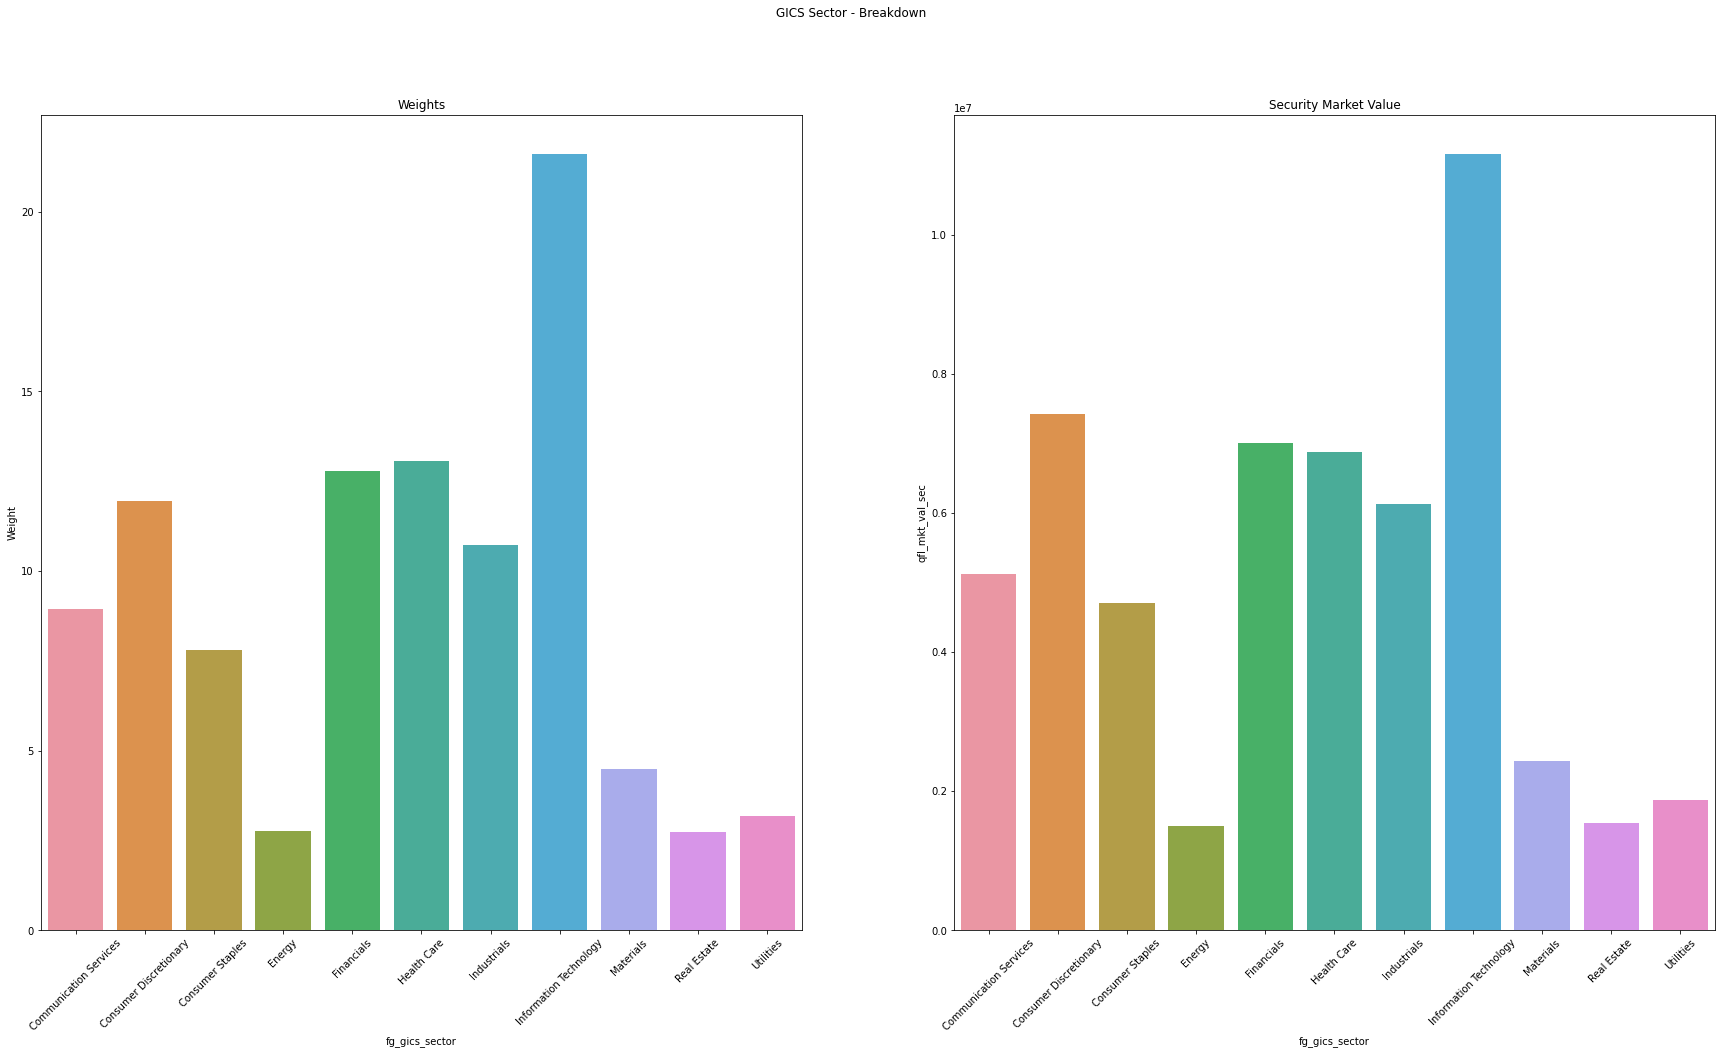

In [390]:
# Group universe

# GICS Sector
GICS_grouped = qfl_df.groupby('fg_gics_sector').sum()

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('GICS Sector - Breakdown')
axes[0].set_title('Weights')
axes[1].set_title('Security Market Value')

chart = sns.barplot(ax=axes[0], x = GICS_grouped.index, y = 'Weight', data = GICS_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart = sns.barplot(ax=axes[1], x = GICS_grouped.index, y = 'qfl_mkt_val_sec', data = GICS_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

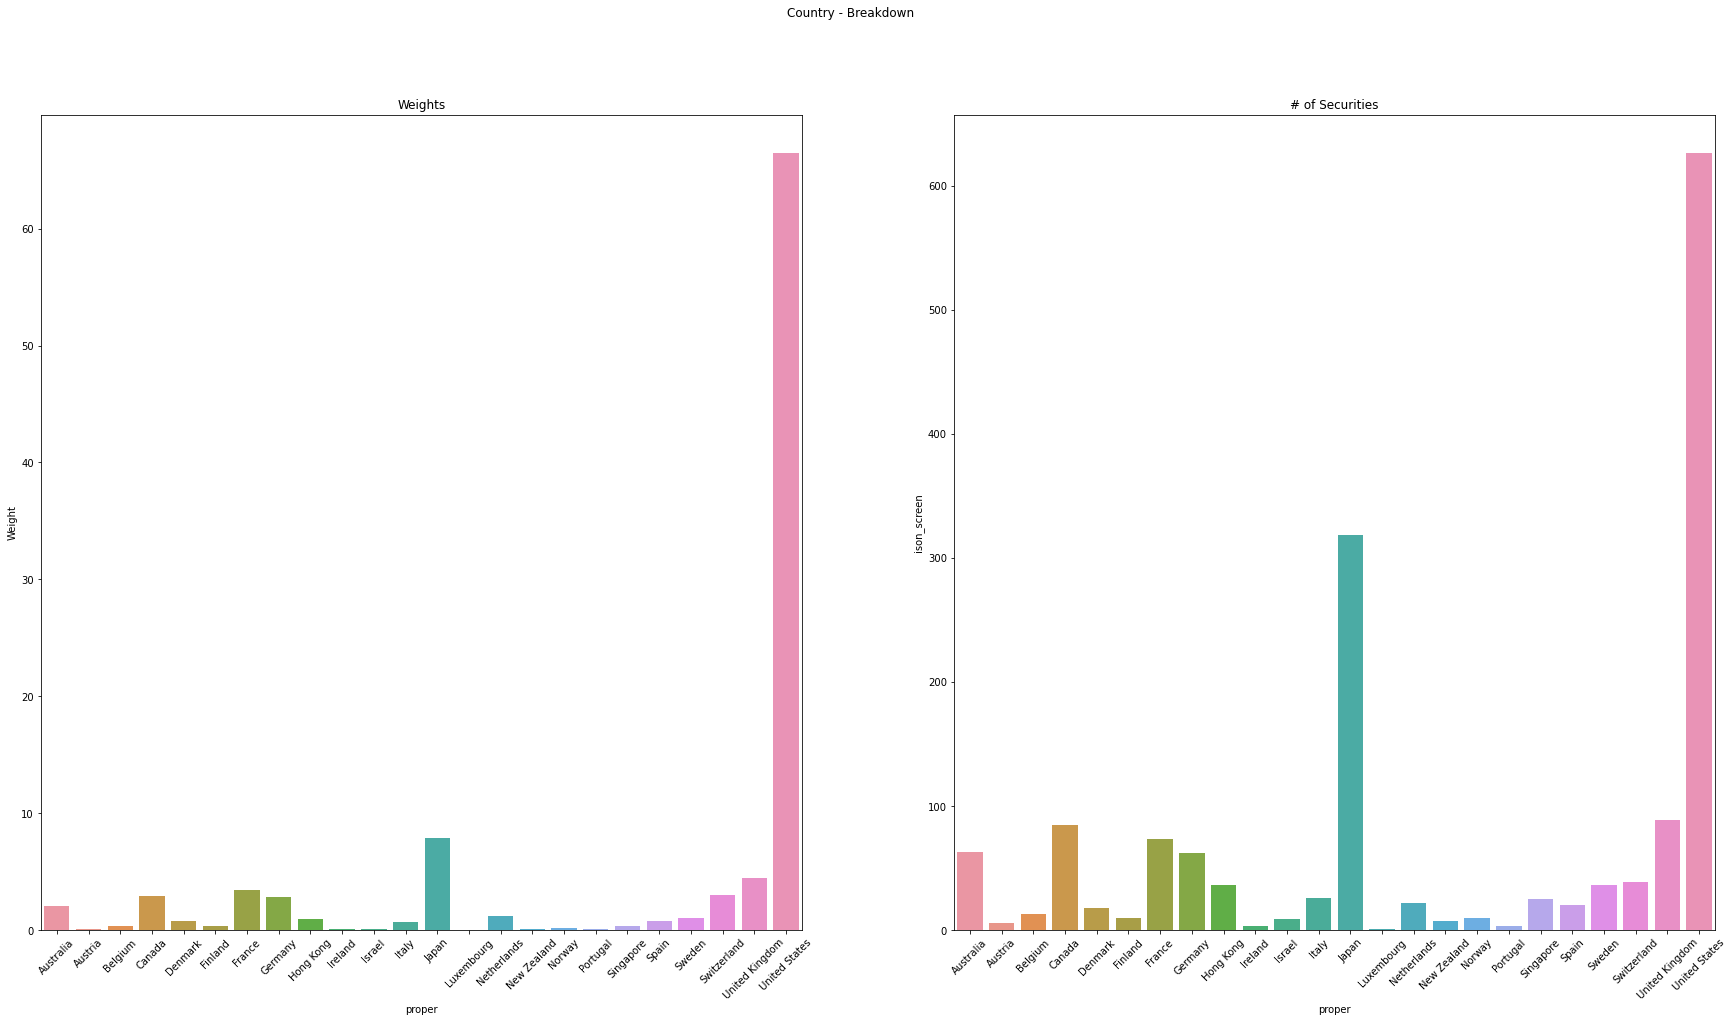

In [391]:
# Group universe

# Country
Country_grouped = qfl_df.groupby('proper').sum()

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Country - Breakdown')
axes[0].set_title('Weights')
axes[1].set_title('# of Securities')

chart = sns.barplot(ax=axes[0], x = Country_grouped.index, y = 'Weight', data = Country_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart = sns.barplot(ax=axes[1], x = Country_grouped.index, y = 'ison_screen', data = Country_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

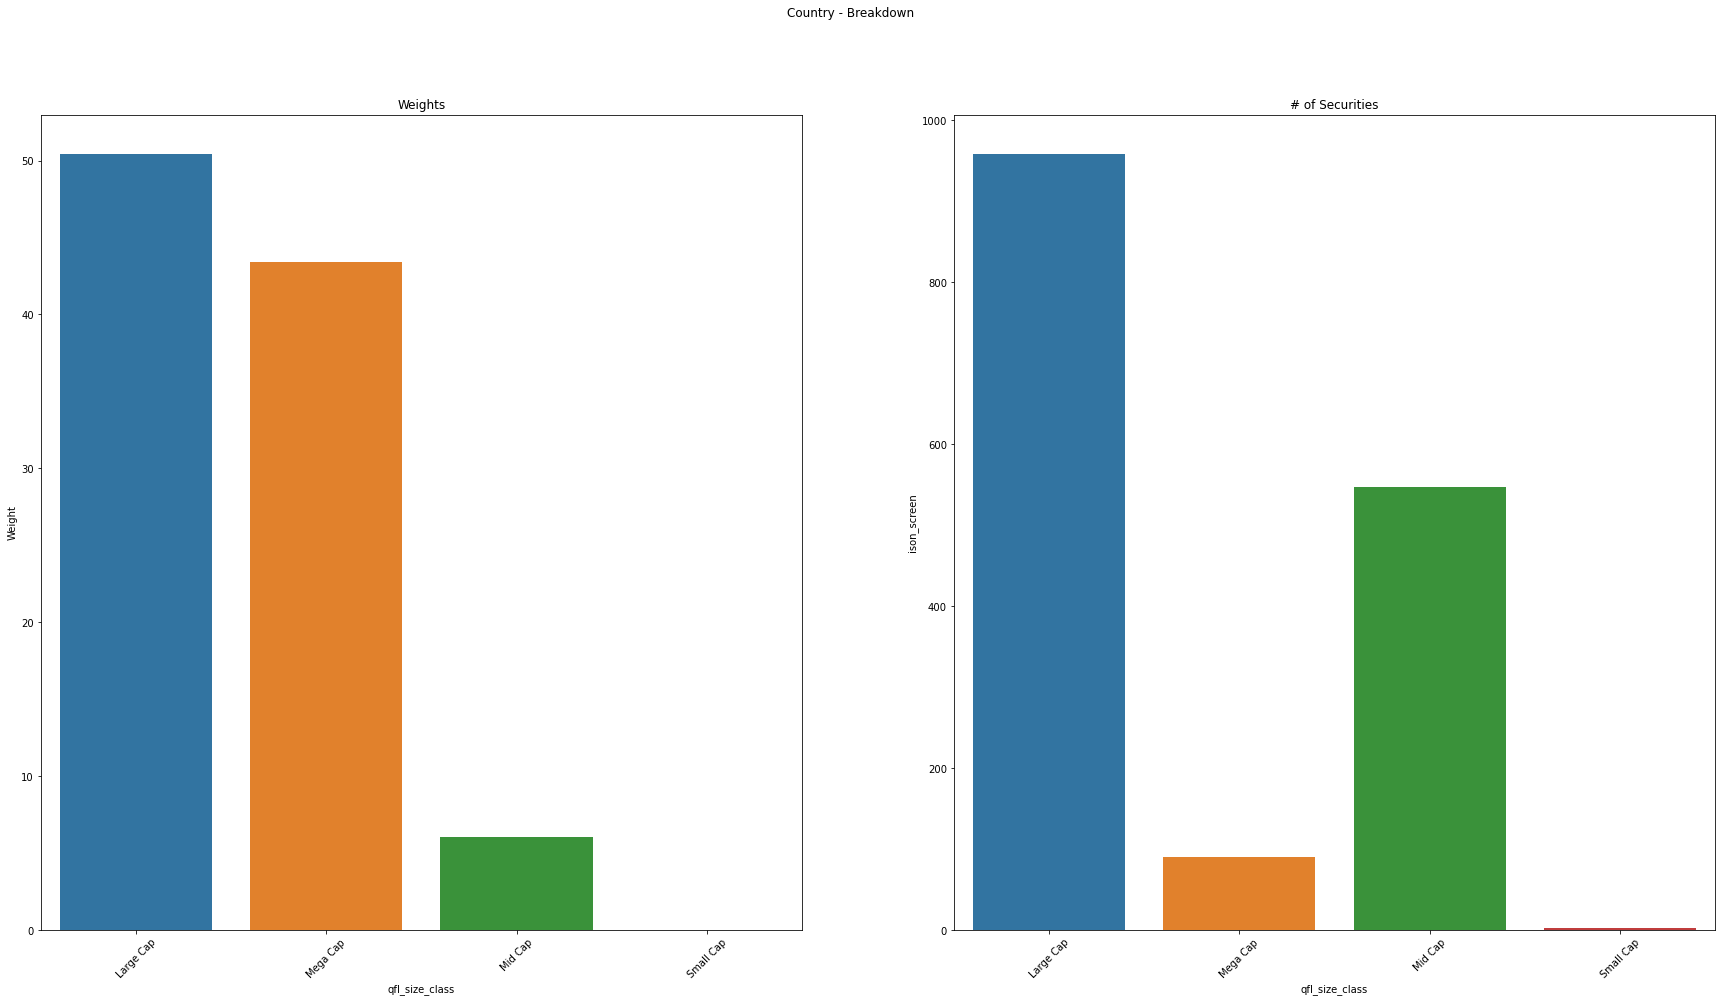

In [392]:
# Group universe

# Size
Size_grouped = qfl_df.groupby('qfl_size_class').sum()

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Country - Breakdown')
axes[0].set_title('Weights')
axes[1].set_title('# of Securities')

chart = sns.barplot(ax=axes[0], x = Size_grouped.index, y = 'Weight', data = Size_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart = sns.barplot(ax=axes[1], x = Size_grouped.index, y = 'ison_screen', data = Size_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [393]:
# Feature Selection

In [394]:
# Discard features with more than 80 NAs

qfl_filtered = qfl_df[qfl_df[qfl_df.columns[filter_idx]].isna().sum(axis = 0)[qfl_df[qfl_df.columns[filter_idx]].isna().sum(axis = 0) < 80].index]

In [395]:
# Replace NAs for retained features with feature's average

for col in qfl_filtered.columns:
    qfl_filtered[col] = qfl_filtered[col].replace(np.nan, qfl_filtered[col].mean(axis = 0))
    
qfl_df['p_total_return'] = qfl_df['p_total_return'].replace(np.nan, 0);

<ipython-input-395-d861f91d7765>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qfl_filtered[col] = qfl_filtered[col].replace(np.nan, qfl_filtered[col].mean(axis = 0))


In [396]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

X = qfl_filtered
Y = qfl_df['p_total_return']

#RECURSIVE FEATURE ELIMINATION

lin_reg = Lasso()
rfe = RFE(lin_reg, n_features_to_select=3, step = 1)
fit_rfe = rfe.fit(X, Y)
print("Num Features: %s" % (fit_rfe.n_features_))
print("Selected Features: %s" % (fit_rfe.support_))
print("Feature Ranking: %s" % (fit_rfe.ranking_))


Num Features: 3
Selected Features: [False False False False False False False False False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False]
Feature Ranking: [ 5  4  3  8  6  7  9 18 20 22 24  1  1 26 28 30 32 34 36 38 40 42 44 46
 47 45 43 41 39 37 35 33 31 29 27 25 23 21 19 17 14  1 13 12 11 15 16 10
  2]


In [397]:
qfl_filtered.columns[fit_rfe.support_]

Index(['QFL_MKT_SHR(0,IND,CT)', 'QFL_MKT_SHR(0,SUBIND,CT)',
       'QFL_MKT_SHR(0,INDGRP,FY1)'],
      dtype='object')

In [398]:
qfl_filtered[qfl_filtered.columns[fit_rfe.support_]].corr()

,"QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,INDGRP,FY1)"
"QFL_MKT_SHR(0,IND,CT)",1.000000,0.736896,0.749843
"QFL_MKT_SHR(0,SUBIND,CT)",0.736896,1.000000,0.549065
"QFL_MKT_SHR(0,INDGRP,FY1)",0.749843,0.549065,1.000000


In [399]:
qfl_filtered[qfl_filtered.columns[fit_rfe.support_]]

,"QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,INDGRP,FY1)"
0,53.235850,53.235850,43.379280
1,49.598522,49.598522,49.050716
2,52.501106,52.501106,36.950640
3,26.381714,81.534874,17.717820
4,71.250410,87.253710,30.177885
...,...,...,...
1595,0.132555,0.217828,0.137487
1596,0.034255,0.034255,0.040264
1597,0.112654,0.185124,0.118281
1598,0.931388,1.273055,0.763471


In [400]:
# MFR Z-Score after Feature Selection

qfl_mfr_RFE = pd.DataFrame()

for factor in qfl_filtered[qfl_filtered.columns[fit_rfe.support_]]:
    z_score_RFE = ( qfl_filtered[factor] - qfl_filtered[factor].mean() ) / qfl_filtered[factor].std()
    qfl_mfr_RFE[factor] = z_score_RFE

qfl_mfr_RFE['MFR'] = qfl_mfr_RFE.mean(axis = 1)

qfl_mfr_RFE.head()

,"QFL_MKT_SHR(0,IND,CT)","QFL_MKT_SHR(0,SUBIND,CT)","QFL_MKT_SHR(0,INDGRP,FY1)",MFR
0,3.625646,2.374022,5.135943,3.711871
1,3.330849,2.154813,5.880763,3.788808
2,3.566097,2.329742,4.291682,3.395840
3,1.449181,4.079507,1.765871,2.431520
4,5.085685,4.424162,3.402228,4.304025


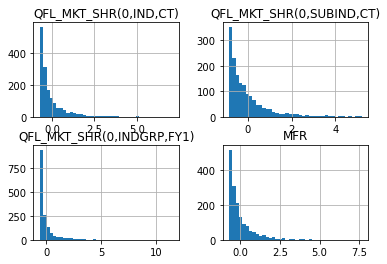

In [401]:
qfl_mfr_RFE.hist(bins = int(np.sqrt(len(qfl_mfr_RFE['MFR']))));

In [405]:
# Check Infomation Coefficient: MFR (Components: RFE's Feature Selected, Z-Scored)

sp_corr_z_rfe, sp_pval_z_rfe = stats.spearmanr(-qfl_mfr_RFE['MFR'].replace(np.nan, 0), qfl_df['p_total_return'].replace(np.nan, 0))
print('Information Coefficient: {0}'.format(round(sp_corr_z_rfe,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_rfe,2)))

Information Coefficient: -0.11
Information Coefficient (P-Value): 0.0


# Information Coefficient Summary (LVRB)

### Feature Selection: Recoursive Feature Elimination (RFE + Lasso) (3 Top Components)

In [406]:
print('Information Coefficient: {0}'.format(round(sp_corr_z_rfe,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_rfe,2)))

Information Coefficient: -0.11
Information Coefficient (P-Value): 0.0


### Z-Score + Log-Transformation (All Components)

In [409]:
print('Information Coefficient: {0}'.format(round(sp_corr_z_log,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_log,2)))

Information Coefficient: -0.04
Information Coefficient (P-Value): 0.09


### Z-Score Only (All Components)

In [410]:
print('Information Coefficient: {0}'.format(round(sp_corr_z,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z,2)))

Information Coefficient: 0.05
Information Coefficient (P-Value): 0.04
